### Program written by Pablo Sánchez-Palencia, 2022

Scope: To reproduce the figures from the publication "Spinel nitride solid solutions: charting properties in the configurational space with explainable machine learning". Figures not involving data (Fig.1 and Fig.8b) or involving different parameters of the models (Fig.2, Fig 5a and 5b, Fig 6c and 6d) are not included. The latter can be found in the code of the correspoding model in the ML_models/ folder.   

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
import numpy as np
import pickle

In [2]:
#Increase quality of the figures for saving, it can be commented to visualize them easily in the notebook.
matplotlib.rcParams.update({'figure.dpi':600})

In [3]:
#Load the data
allstr = pd.read_pickle('../descriptors/correlationmatrix_allstr/str_corrm.pkl')

### Figure 3

In [4]:
matplotlib.rcParams.update({'font.size': 20})

In [5]:
# Metrics for the tests performed with every combination model-descriptor 
Index= ['MLP', 'GBDT', 'LR']
Cols = ['CME', 'MBTR', 'CCF']
values = np.array([[30, 29, 6], [25, 34, 13], [30, 16, 3]])
df_emix = pd.DataFrame(values, index=Index, columns=Cols)

Index= ['MLP', 'GBDT', 'LR']
Cols = ['CME', 'MBTR', 'CCF']
values = np.array([[15, 16, 6], [11, 17, 9], [13, 15, 8]])
df_egap = pd.DataFrame(values, index=Index, columns=Cols)

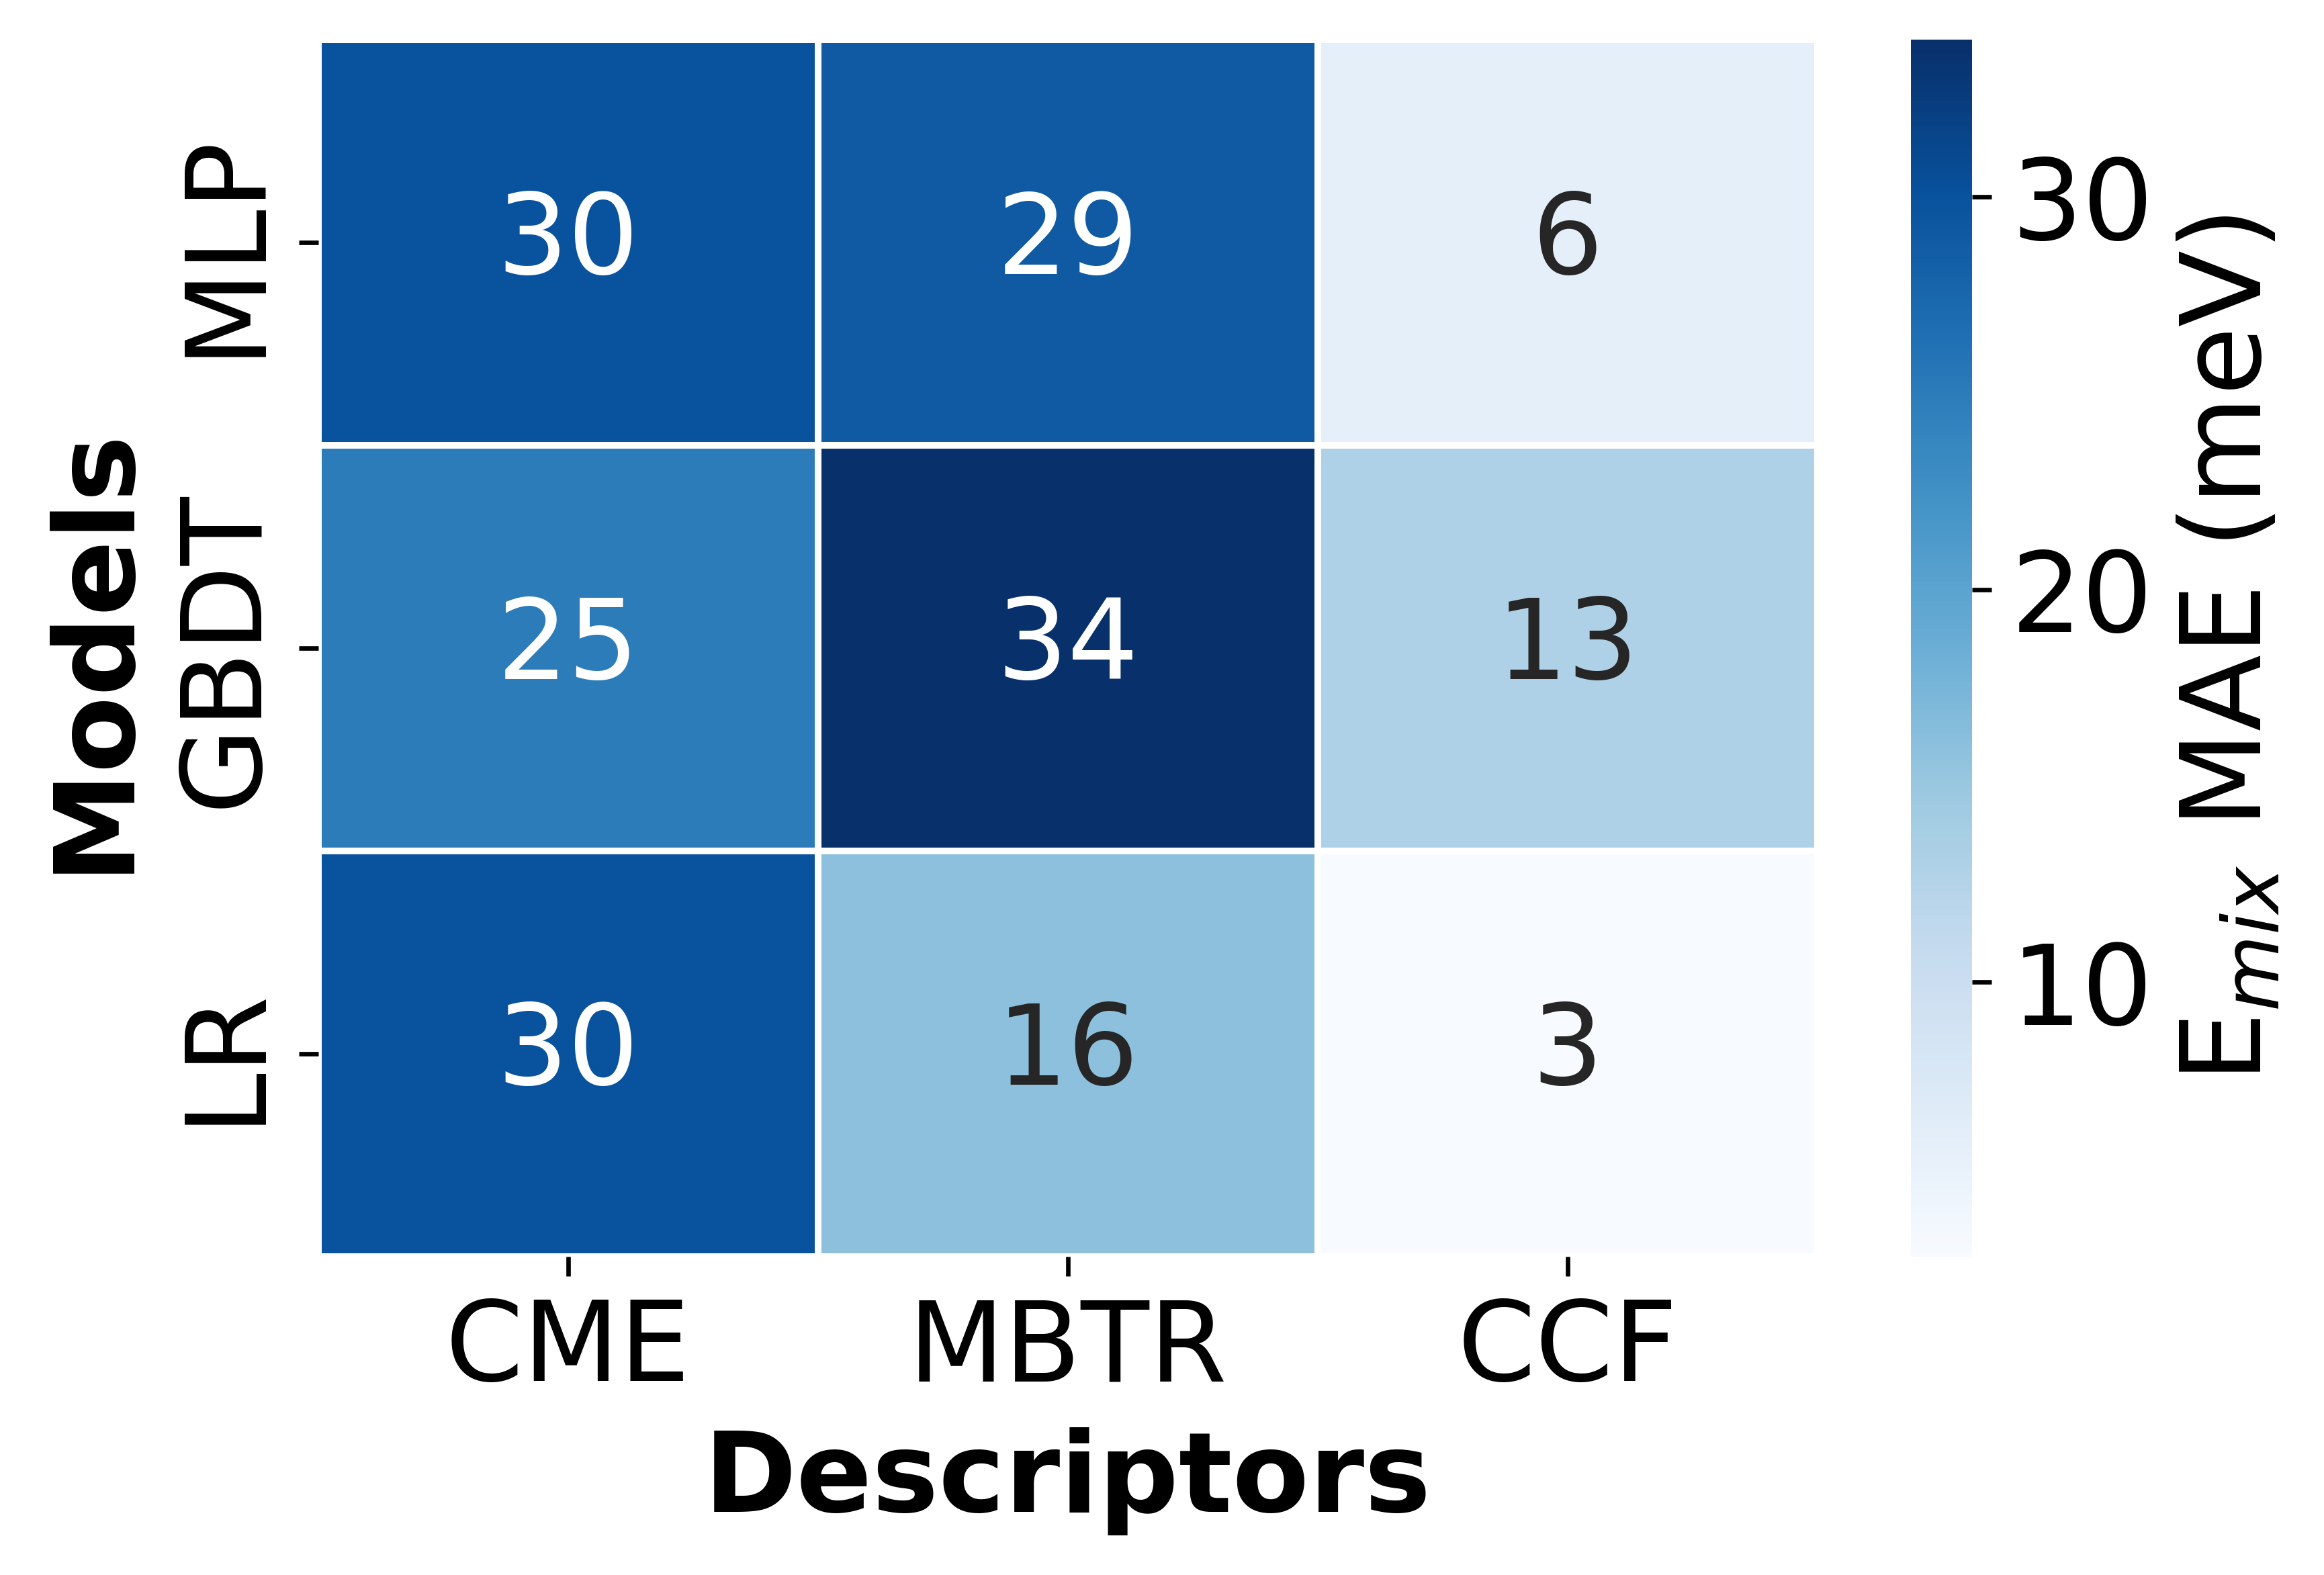

In [6]:
#Figure 3a
sns.heatmap(df_emix, annot=True, linewidths=1, cmap='Blues', cbar_kws={'label':'E$_{mix}$ MAE (meV)'})
plt.xlabel('Descriptors',fontweight='bold')
plt.ylabel('Models',fontweight='bold')
plt.show()

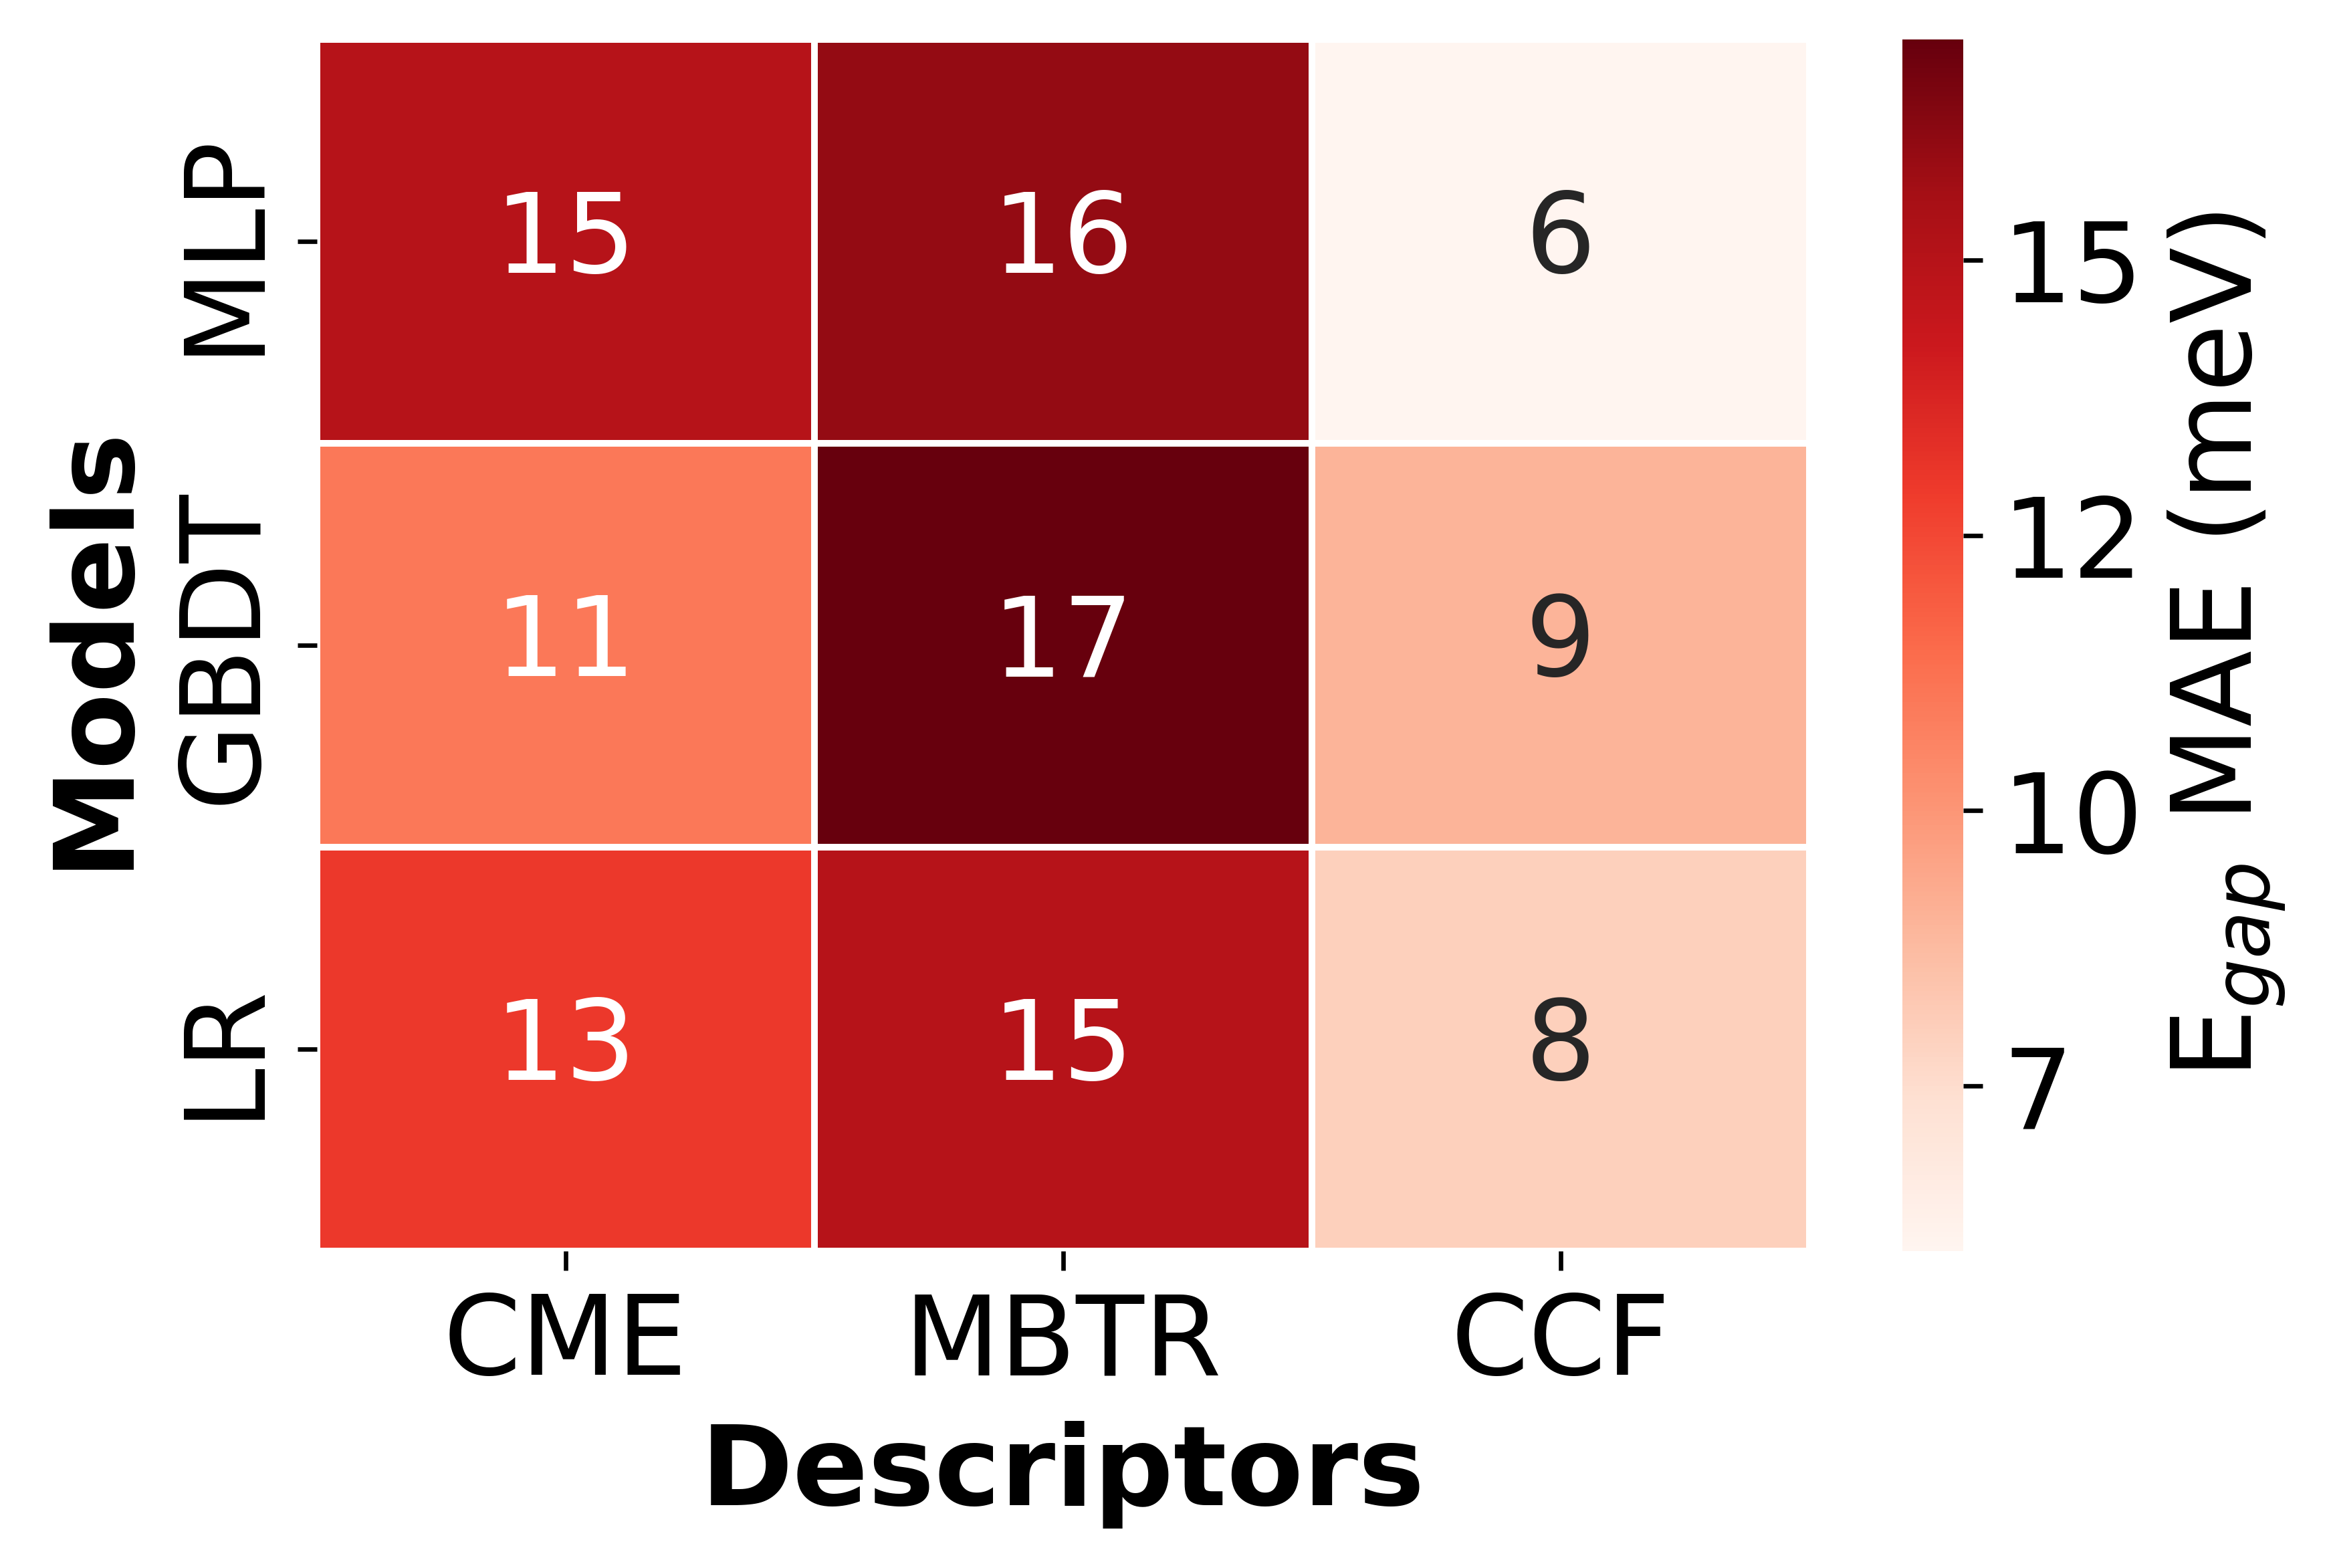

In [7]:
#Figure 3b
sns.heatmap(df_egap, annot=True, linewidths=1, cmap='Reds', cbar_kws={'label':'E$_{gap}$ MAE (meV)', 'format':'%i'})
plt.xlabel('Descriptors',fontweight='bold')
plt.ylabel('Models',fontweight='bold')
plt.show()

In [8]:
#Reset default parameter of fontsize for the rest of figures
matplotlib.rcParams.update({'font.size': 10}) #default

### Figure 4

In [9]:
# Metrics for the different tests performed with reduced training sets
x=[202,505,810]

mlp_hse =np.array([0.00750125773078686,0.00672191653997803,0.00586785995970094])*1000
gbdt_hse=np.array([0.015997588642385,0.0103880548249608,0.00895465915428884])*1000
lr_hse  =np.array([0.00784904915266597,0.00767004599236504,0.00779585821271484])*1000

mlp_mixe =np.array([0.0092058690733028,0.00681242165541196,0.00593553336071461])*1000
gbdt_mixe=np.array([0.0278942496811276,0.0146797587007536,0.0126362376707067])*1000
lr_mixe  =np.array([0.00354056919874339,0.00331838708476159,0.00335699365005107])*1000

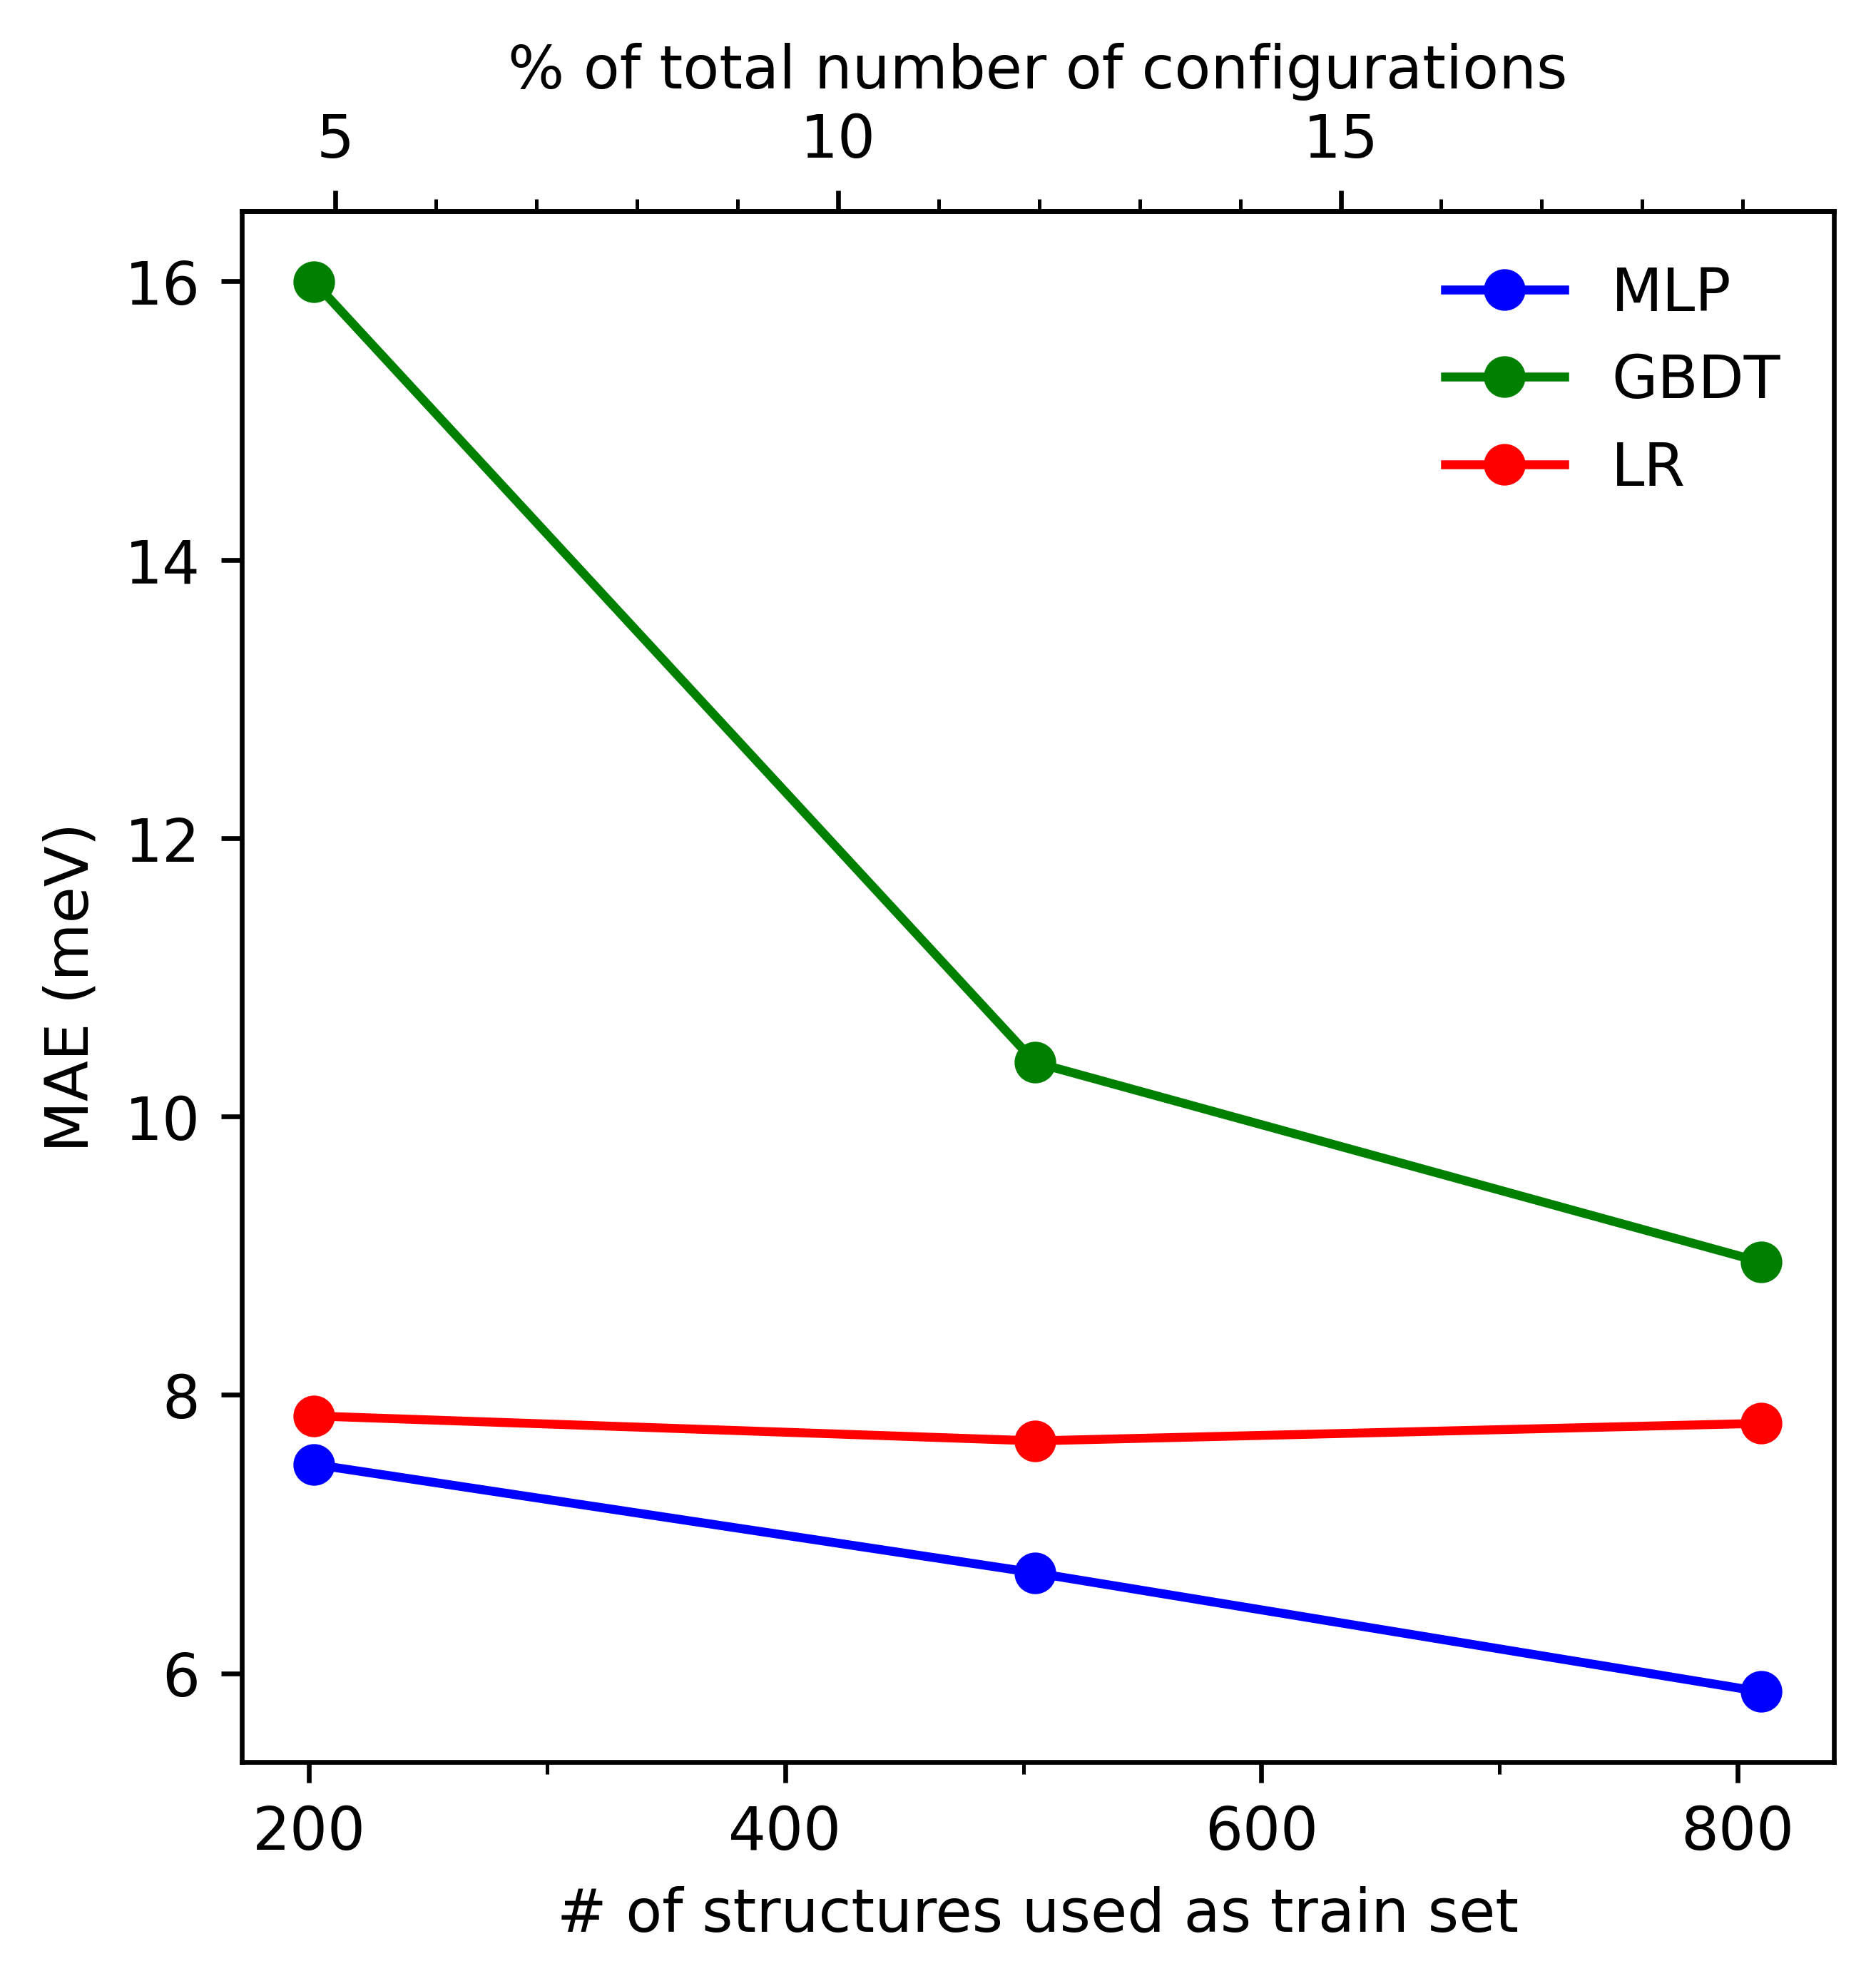

In [10]:
#Figure 4a
plt.figure(figsize=[4.8,4.8])
plt.ylabel("MAE (meV)")
plt.xlabel("# of structures used as train set")
ax=plt.gca()
ax.set_xticks([200,400,600,800])
ax.set_xticks([100,200,300,400,500,600,700,800],minor=True)
secax = ax.secondary_xaxis('top', functions=(lambda x: x/4222*100, lambda x: x/100*4222))
secax.set_xlabel('% of total number of configurations')
secax.set_xticks([5,10,15,20])
secax.set_xticks([5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],minor=True)
plt.plot(x,mlp_hse,'bo-')
plt.plot(x,gbdt_hse,'go-')
plt.plot(x,lr_hse,'ro-')
plt.legend(["MLP","GBDT","LR"],frameon=False)
plt.show()

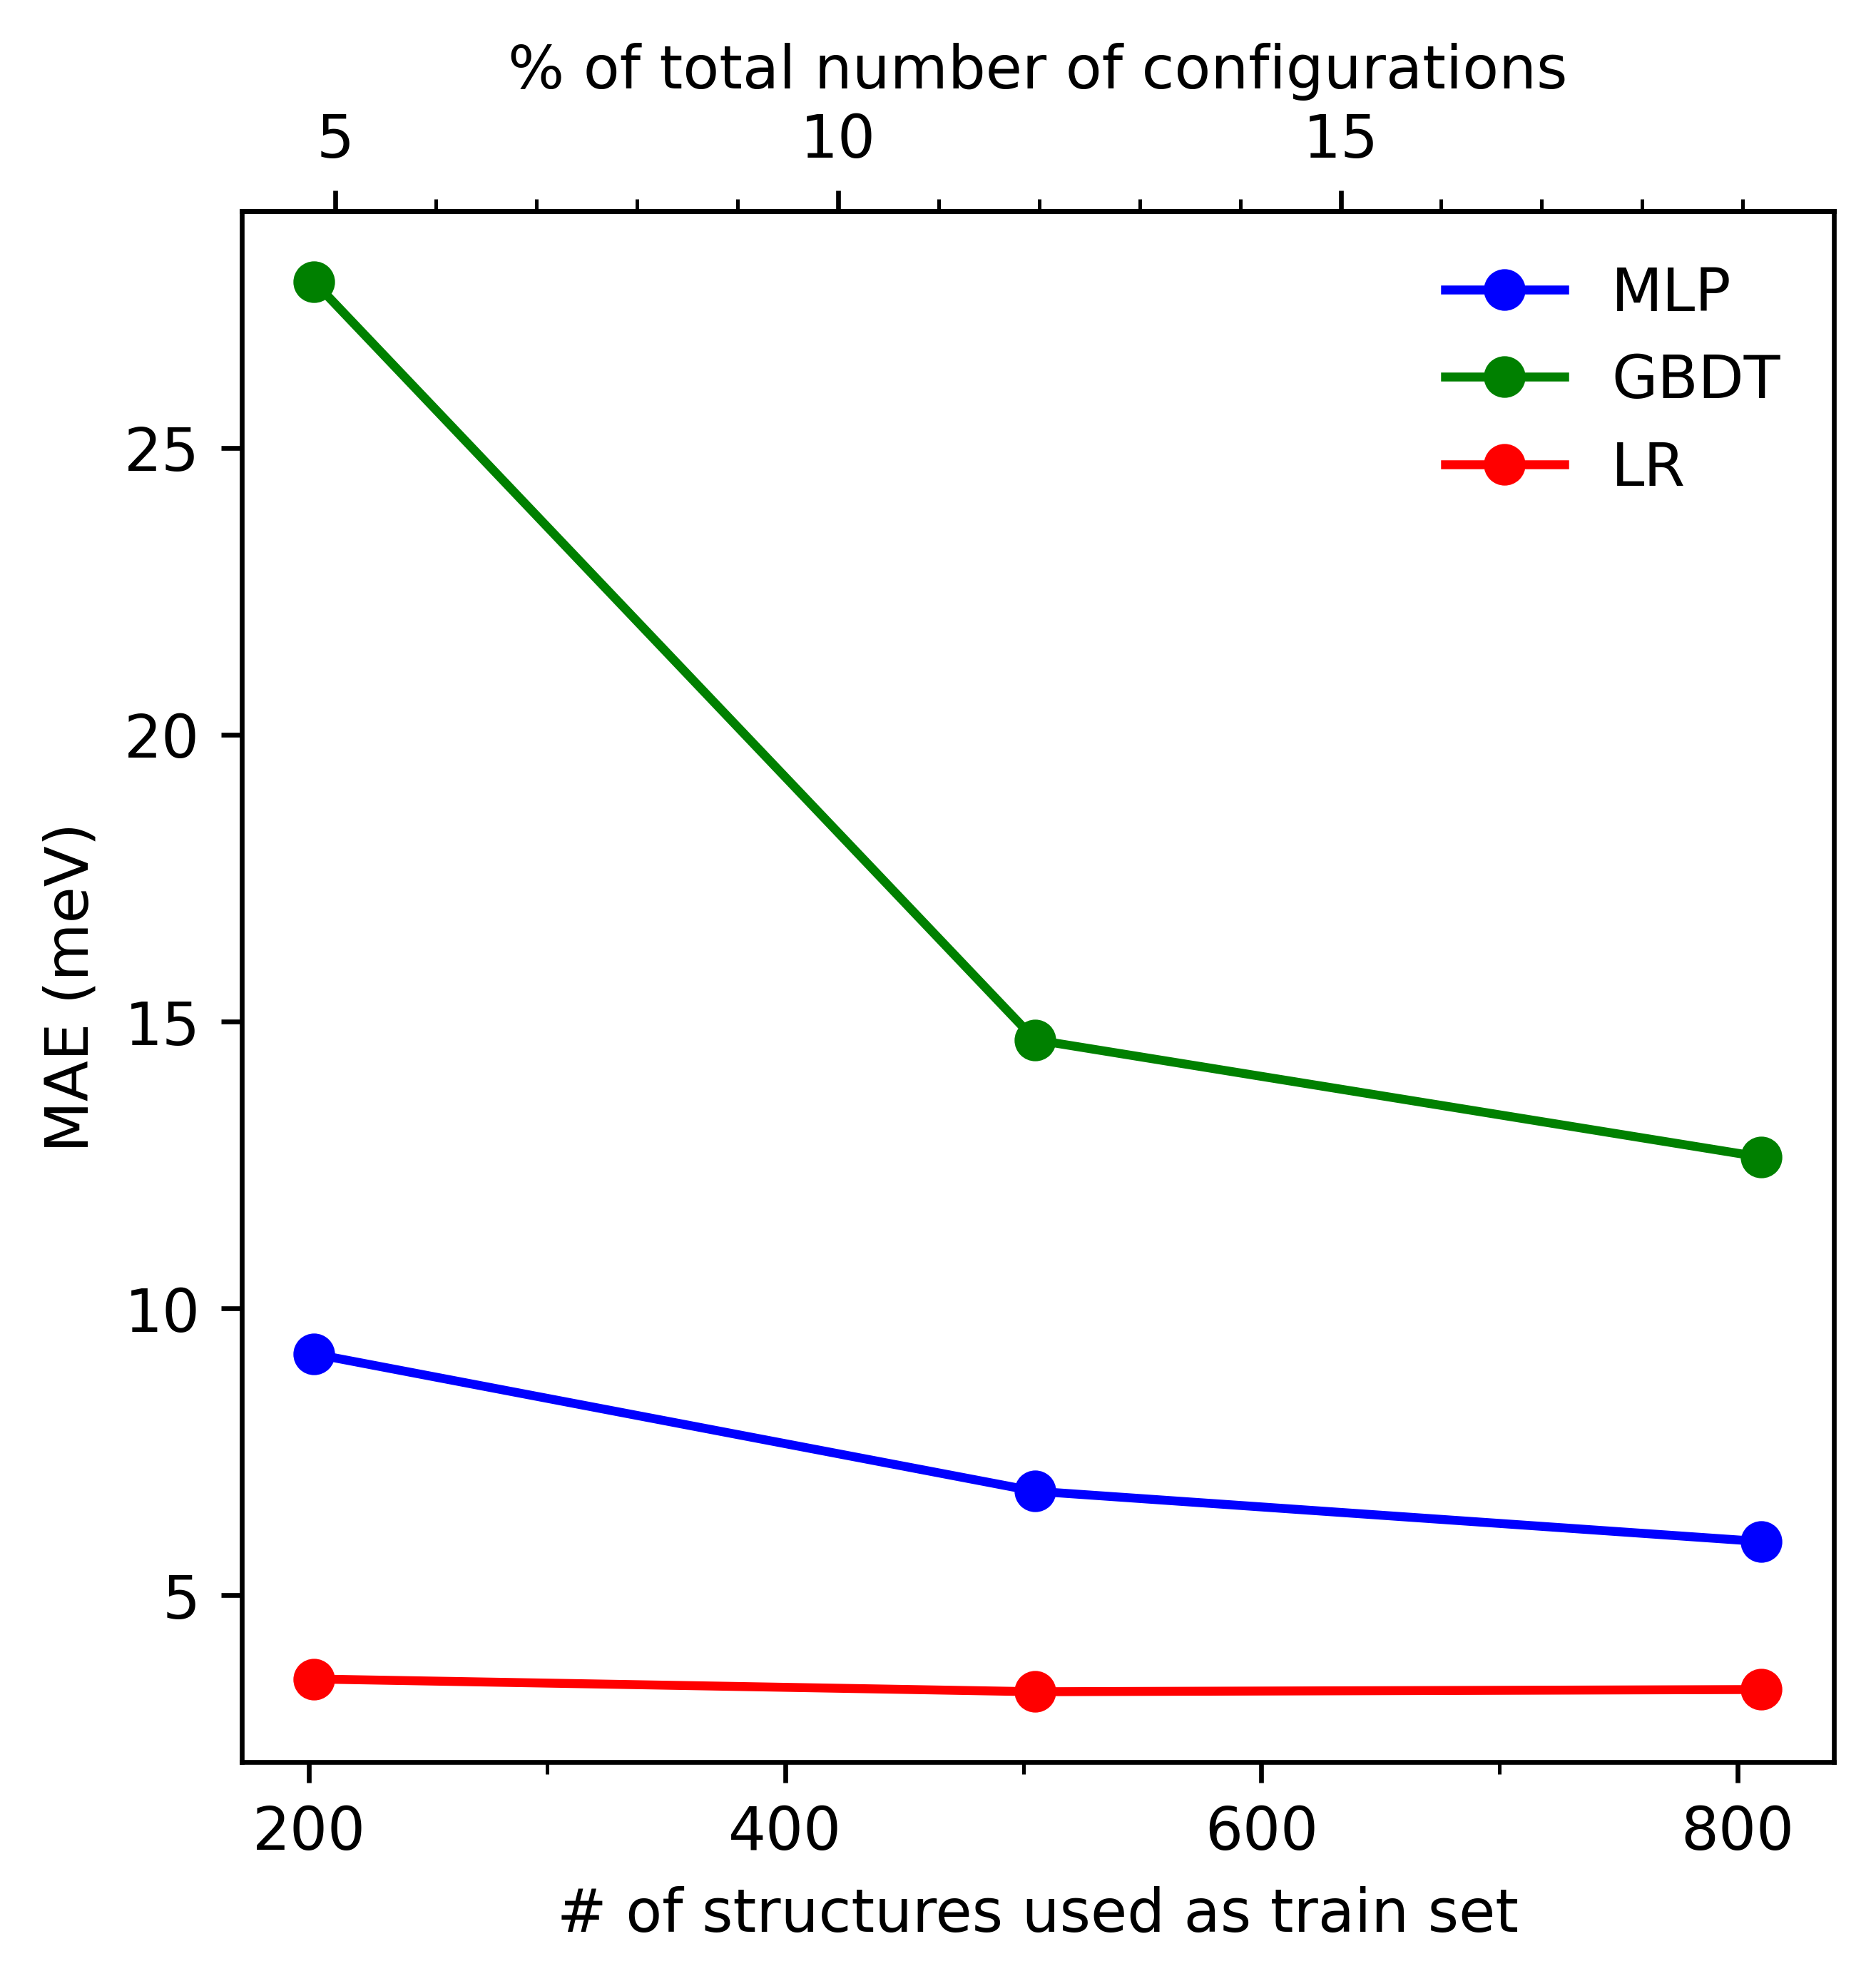

In [11]:
#Figure 4b
plt.figure(figsize=[4.8,4.8])
plt.ylabel("MAE (meV)")
plt.xlabel("# of structures used as train set")
ax=plt.gca()
ax.set_xticks([200,400,600,800])
ax.set_xticks([100,200,300,400,500,600,700,800],minor=True)
secax = ax.secondary_xaxis('top', functions=(lambda x: x/4222*100, lambda x: x/100*4222))
secax.set_xlabel('% of total number of configurations')
secax.set_xticks([5,10,15,20])
secax.set_xticks([5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],minor=True)
plt.plot(x,mlp_mixe,'bo-')
plt.plot(x,gbdt_mixe,'go-')
plt.plot(x,lr_mixe,'ro-')
plt.legend(["MLP","GBDT","LR"],frameon=False)
plt.show()

### Figure 5

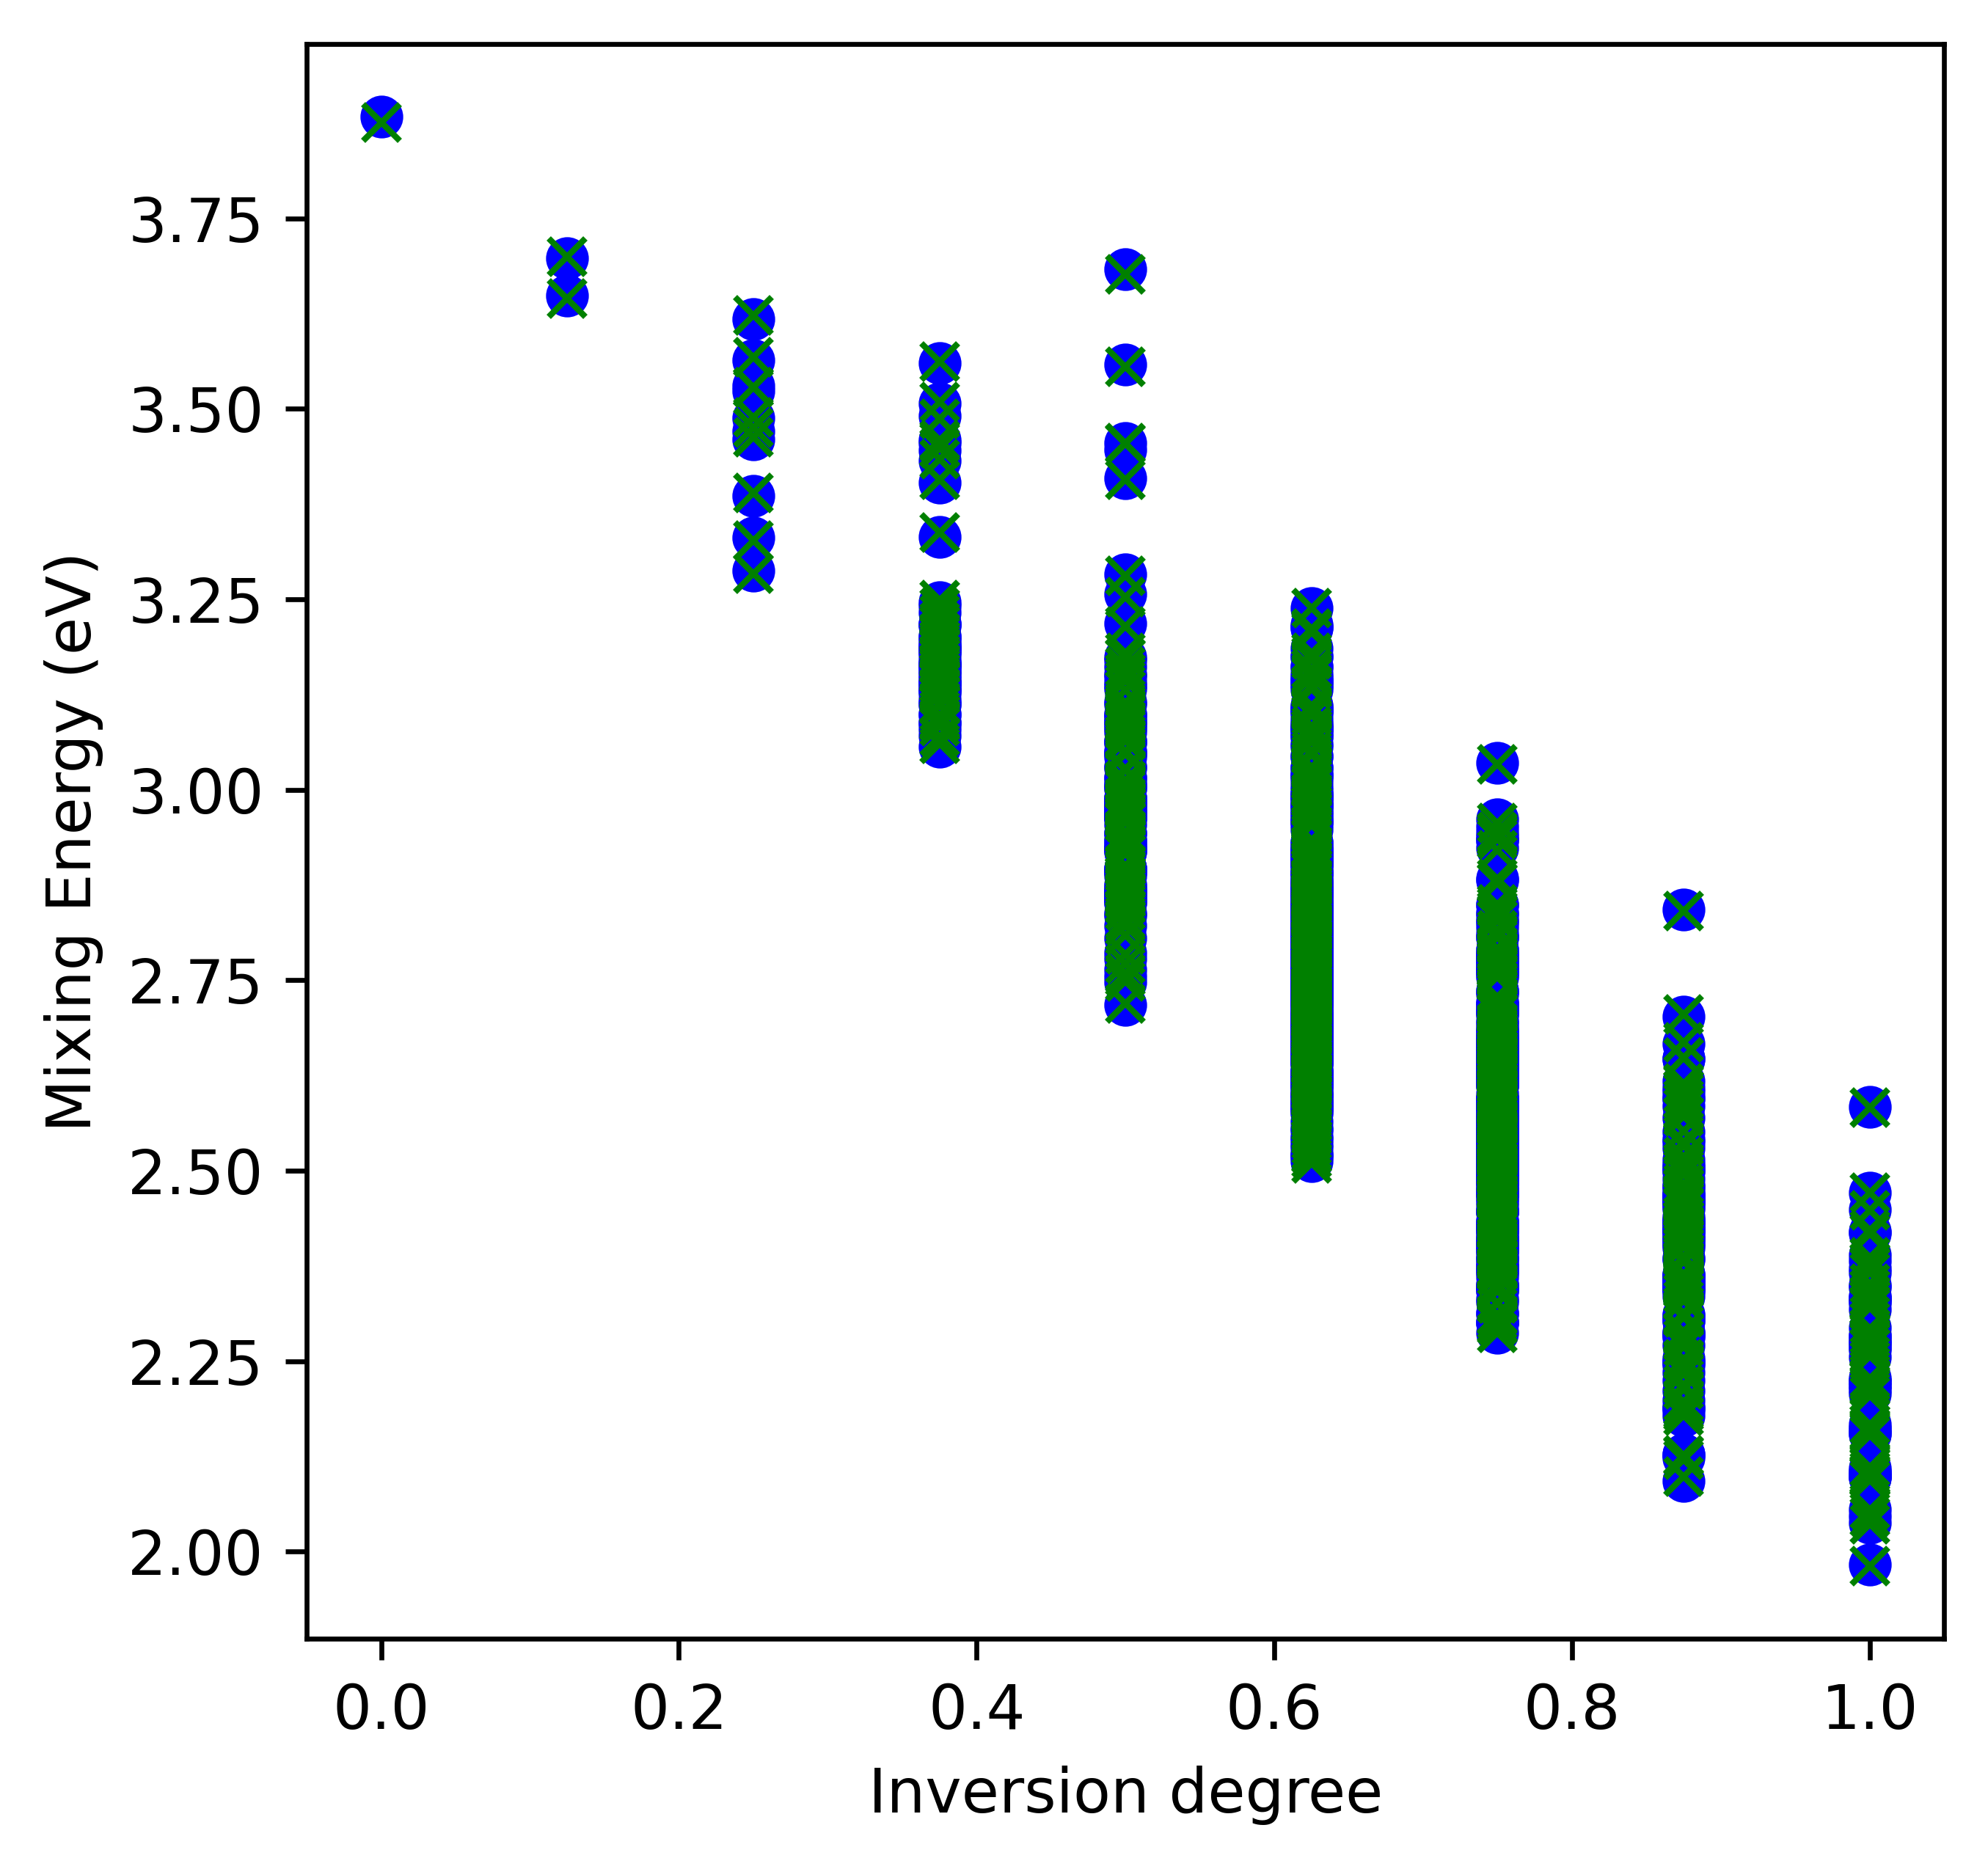

In [12]:
#Figure 5c
plt.figure(figsize=[4.8,4.8])
plt.plot(allstr[allstr['gga_data']==True]['y'],allstr[allstr['gga_data']==True]['MixE_pred'],'bo')
plt.plot(allstr[allstr['gga_data']==True]['y'],allstr[allstr['gga_data']==True]['MixE'],'gx')
plt.xlabel("Inversion degree")
plt.ylabel("Mixing Energy (eV)")
plt.show()

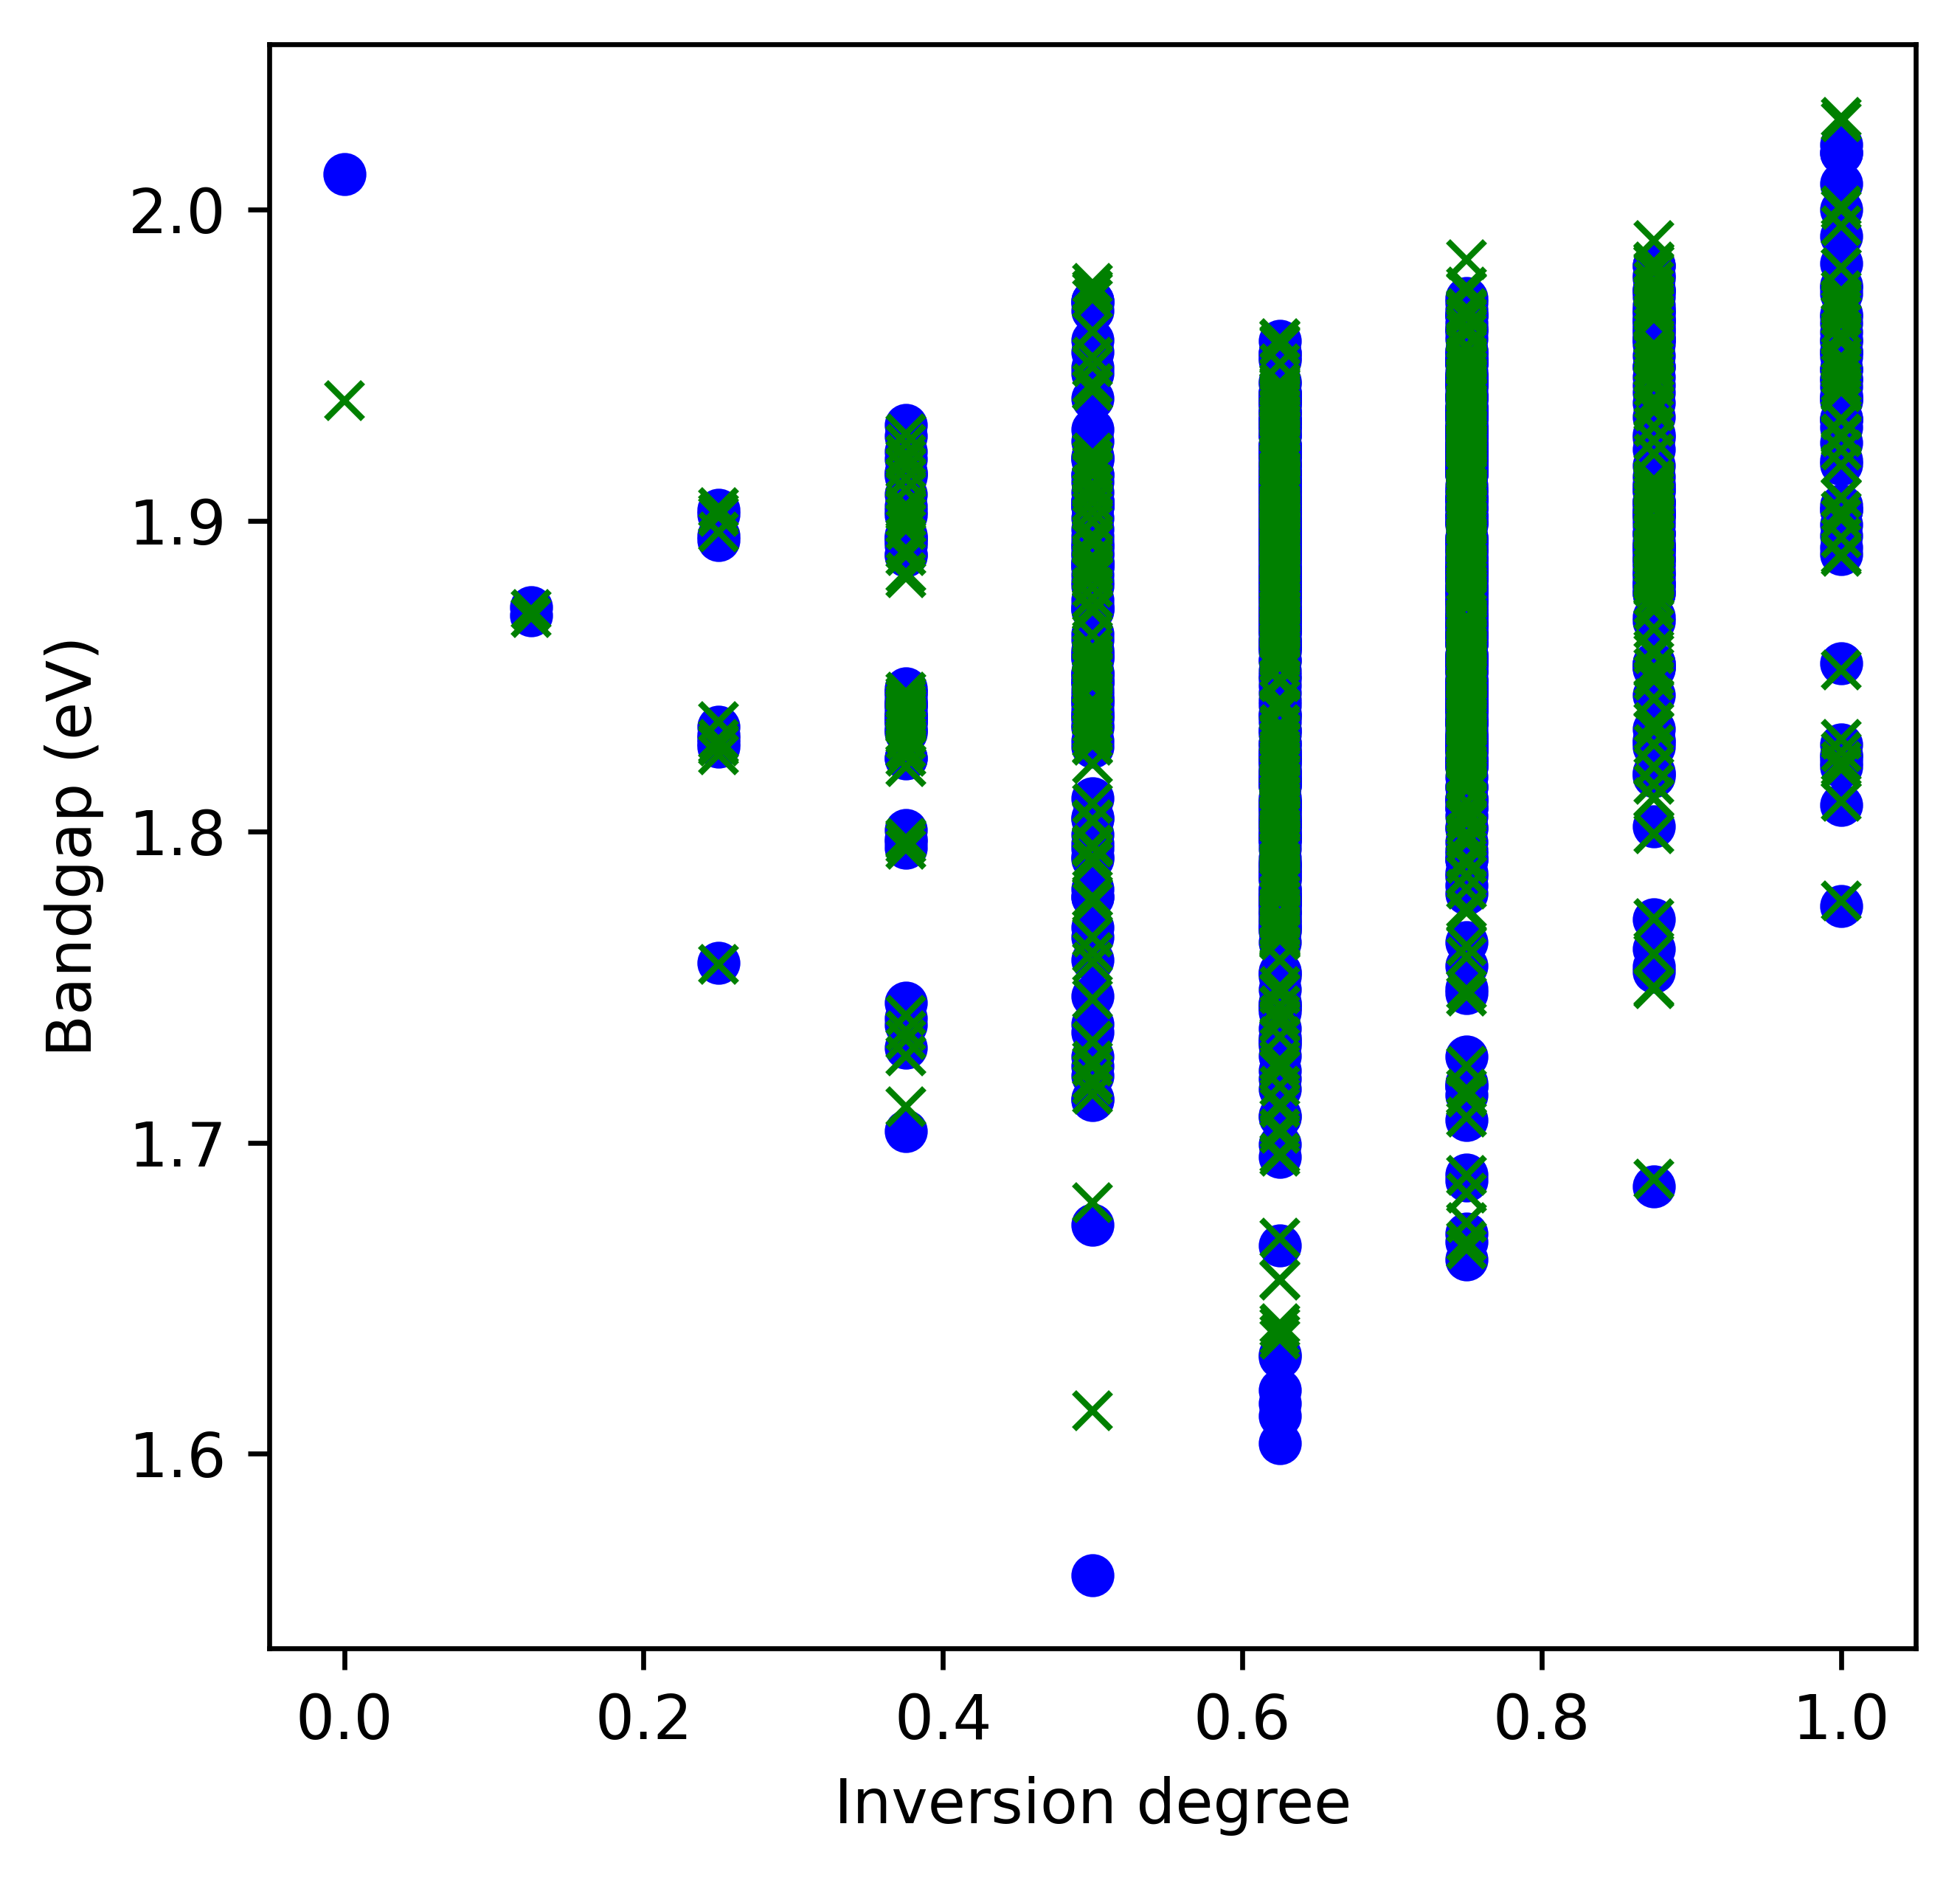

In [13]:
#Figure 5d
plt.figure(figsize=[4.8,4.8])
plt.plot(allstr[allstr['gga_data']==True]['y'],allstr[allstr['gga_data']==True]['HSE-corr_ens-meanpred'],'bo')
plt.plot(allstr[allstr['gga_data']==True]['y'],allstr[allstr['gga_data']==True]['HSE-corr'],'gx')
plt.xlabel("Inversion degree")
plt.ylabel("Bandgap (eV)")
plt.show()

### Figure 6

In [14]:
coef_emix=np.array([-2.21028792e-01,  0.00000000e+00,  3.16320225e-03,  5.09420122e-04,
           -1.19277890e-02, -2.10221573e-02, -2.53739405e-02,  4.00343508e-02,
            4.92744464e-02,  2.50340400e-03, -6.30001605e-03, -3.60753151e-03,
           -4.99212632e-03, -1.25467221e-02, -1.96706322e-03, -4.08164611e-03,
           -4.22224282e-03, -3.00148308e-03,  7.02481444e-03, -4.36905008e-03,
           -1.35342364e-02, -9.46902127e-03, -7.59030010e-05, -4.18849982e-03,
            2.49023396e-02,  1.16498715e-02, -1.72903597e-03,  8.33695191e-03,
            1.09243982e-02, -1.45043261e-03,  2.13833742e-02, -1.44180175e-02,
            7.51369211e-03, -3.26731764e-03])

coef_egap=np.array([ 1.96886026e-02, -0.00000000e+00,  2.01702626e-03,  1.00939510e-03,
                     7.94813222e-03,  7.43001617e-03, -9.90841253e-04, -1.81779895e-02,
                    -1.23285674e-02,  1.44746058e-03,  5.45080503e-03, -3.46905434e-03,
                     4.97120378e-04, -1.08146332e-03, -6.00439815e-05,  4.85220971e-04,
                     1.32060822e-03,  4.36521046e-04, -2.06453807e-03,  2.43315637e-03,
                     3.24060365e-05,  1.94192902e-03,  3.14503989e-03, -4.07471497e-03,
                    -2.26223863e-02, -2.58541547e-03, -7.13070311e-03, -4.45684103e-03,
                     4.09825399e-04, -3.51322935e-03, -9.90774075e-03,  5.01111487e-03,
                    -2.43989313e-03,  6.47755006e-03])

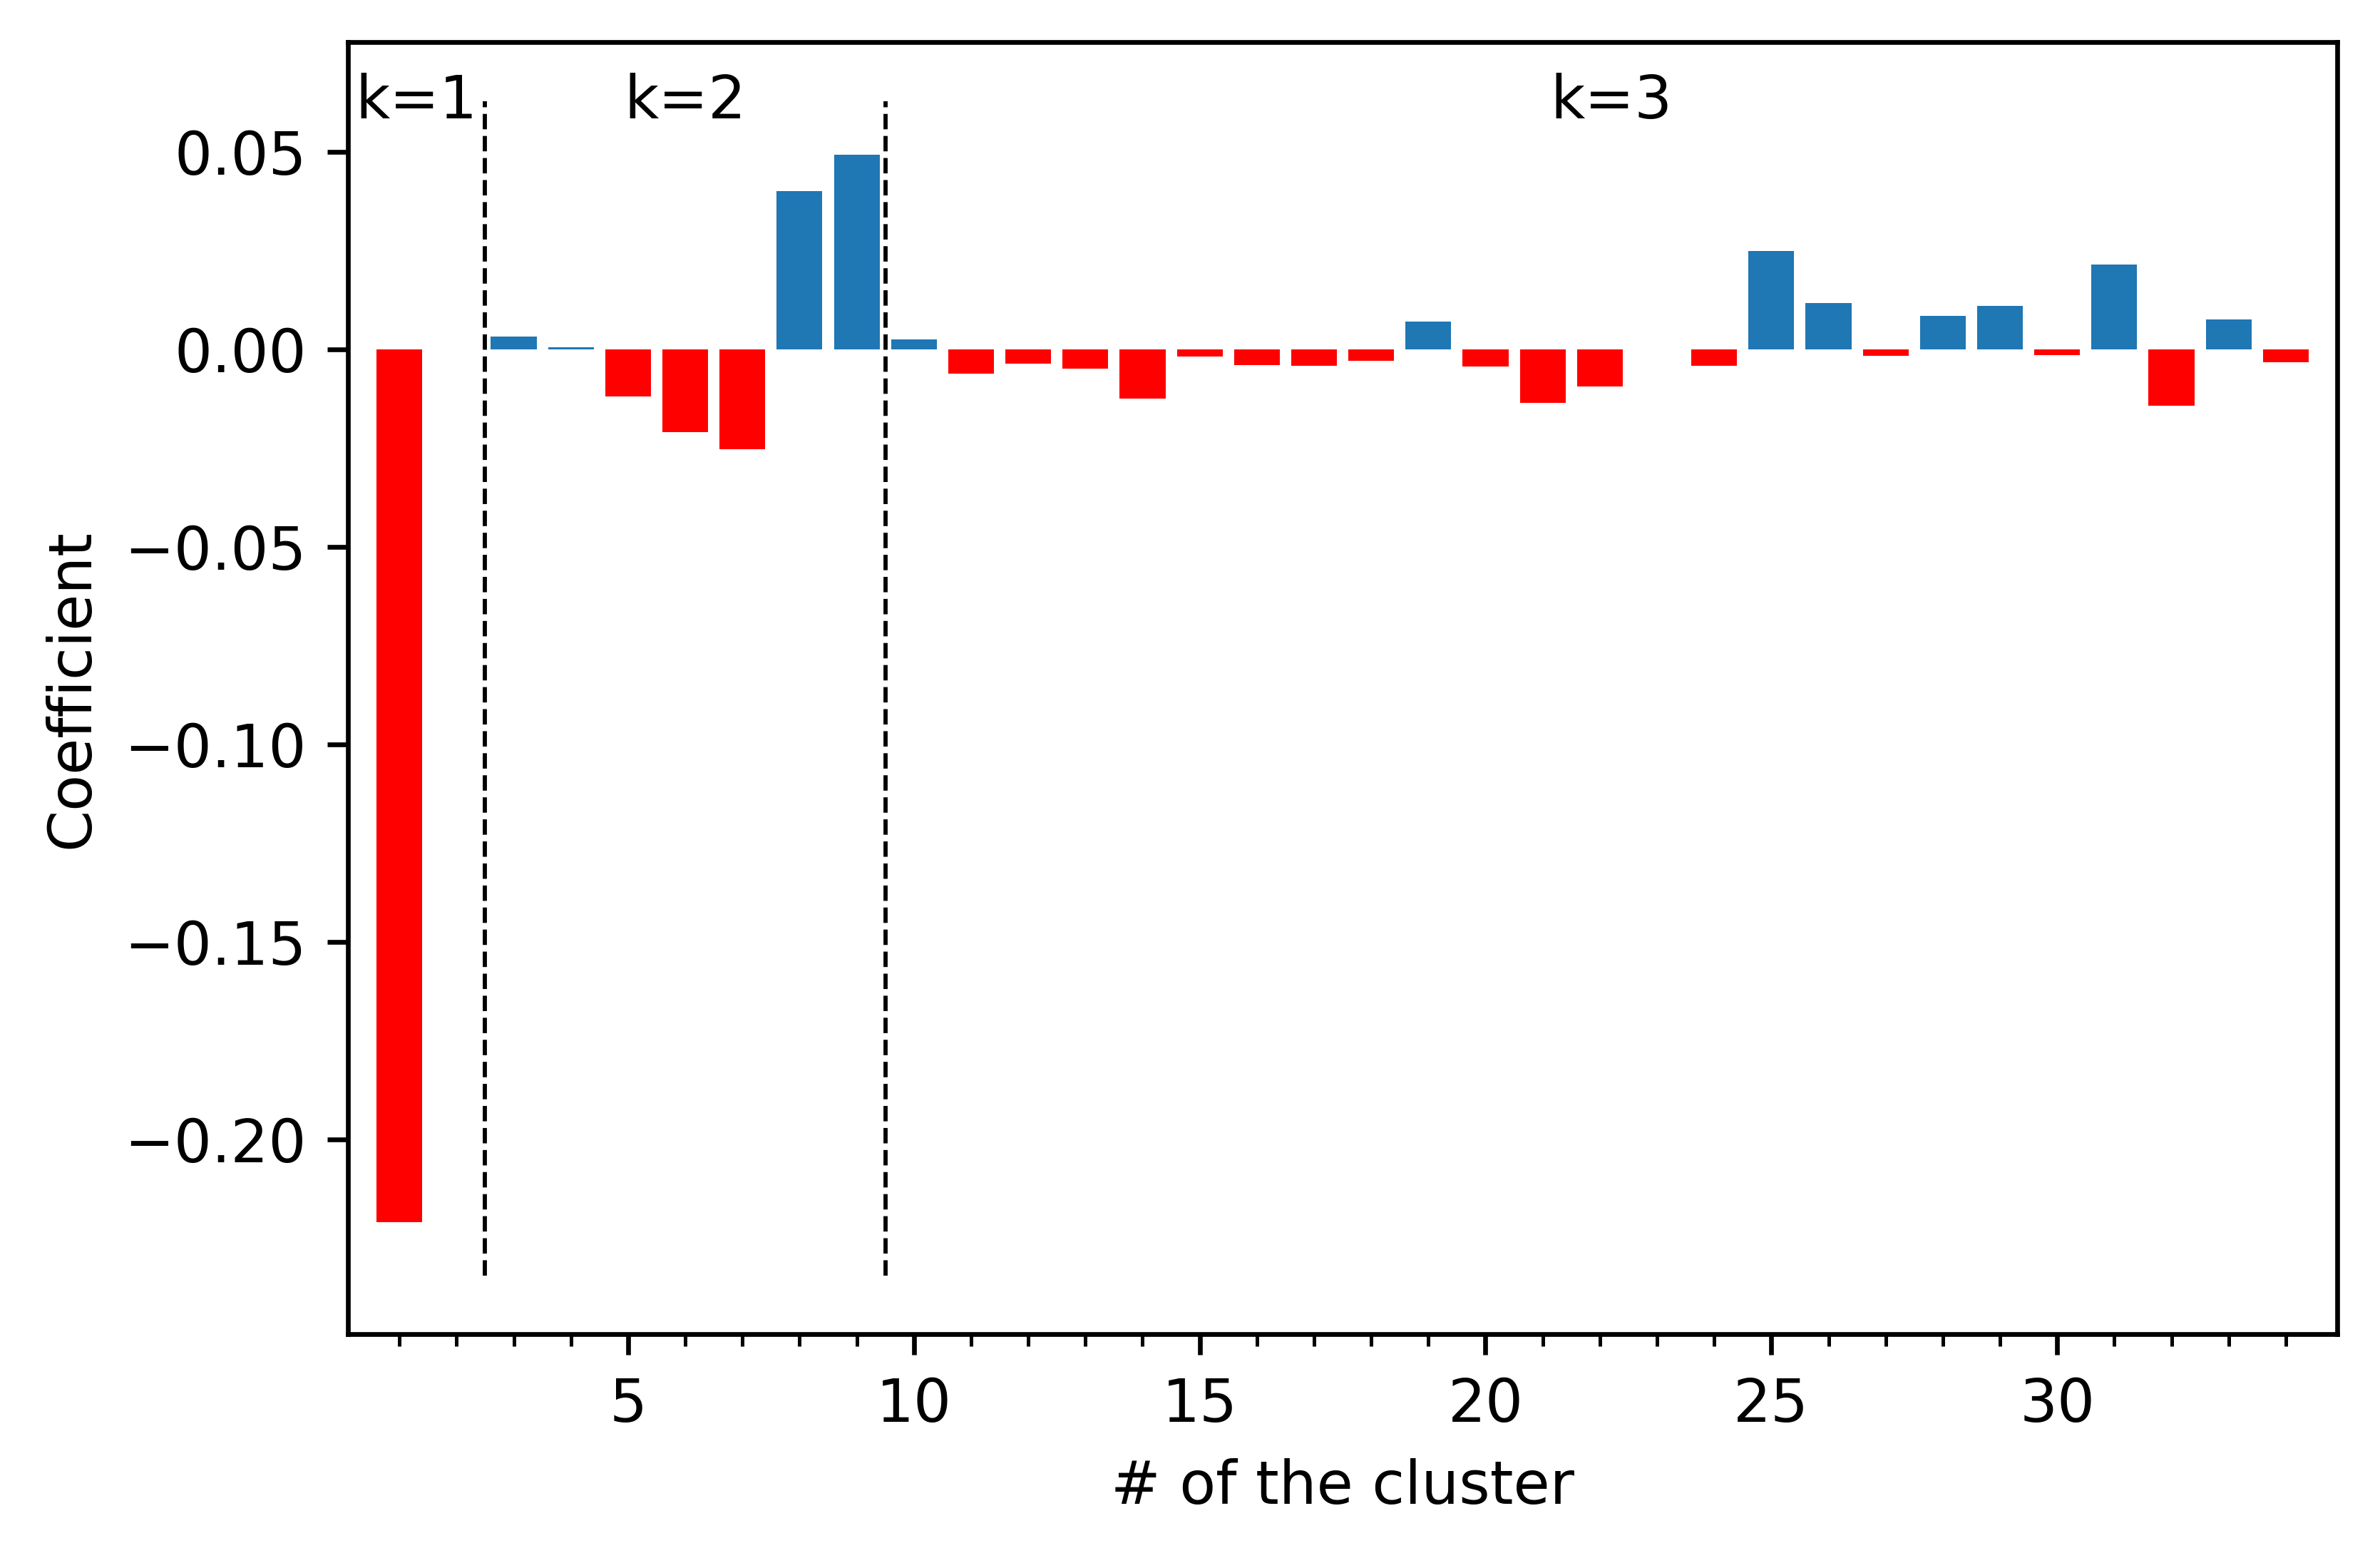

In [15]:
#Figure 6a
plt.figure()
xneg=[];xpos=[];coefneg=[];coefpos=[]
xval=np.linspace(1,34,34)
for val,cc in zip(xval,coef_emix):
    if cc>=0:
        xpos.append(val)
        coefpos.append(cc)
    elif cc<0:
        xneg.append(val)
        coefneg.append(cc)
plt.bar(xpos,coefpos)
plt.bar(xneg,coefneg,color="red")
ax=plt.gca()
ax.set_xticks([5,10,15,20,25,30])
ax.set_xticks(xval,minor=True)
plt.xlim([0.1,34.9])
ymin,ymax=ax.get_ylim()
plt.plot(np.linspace(2.5,2.5,20),np.linspace(ymin,ymax,20),"k--",linewidth=0.7)
plt.plot(np.linspace(9.5,9.5,20),np.linspace(ymin,ymax,20),"k--",linewidth=0.7)
plt.text(0.1+(2.5-0.1)/2,ymax,"k=1",ha="center",va="center")
plt.text(2.5+(9.5-2.5)/2,ymax,"k=2",ha="center",va="center")
plt.text(9.5+(34.9-9.5)/2,ymax,"k=3",ha="center",va="center")
plt.xlabel("# of the cluster")
plt.ylabel("Coefficient")
plt.show()
plt.close()

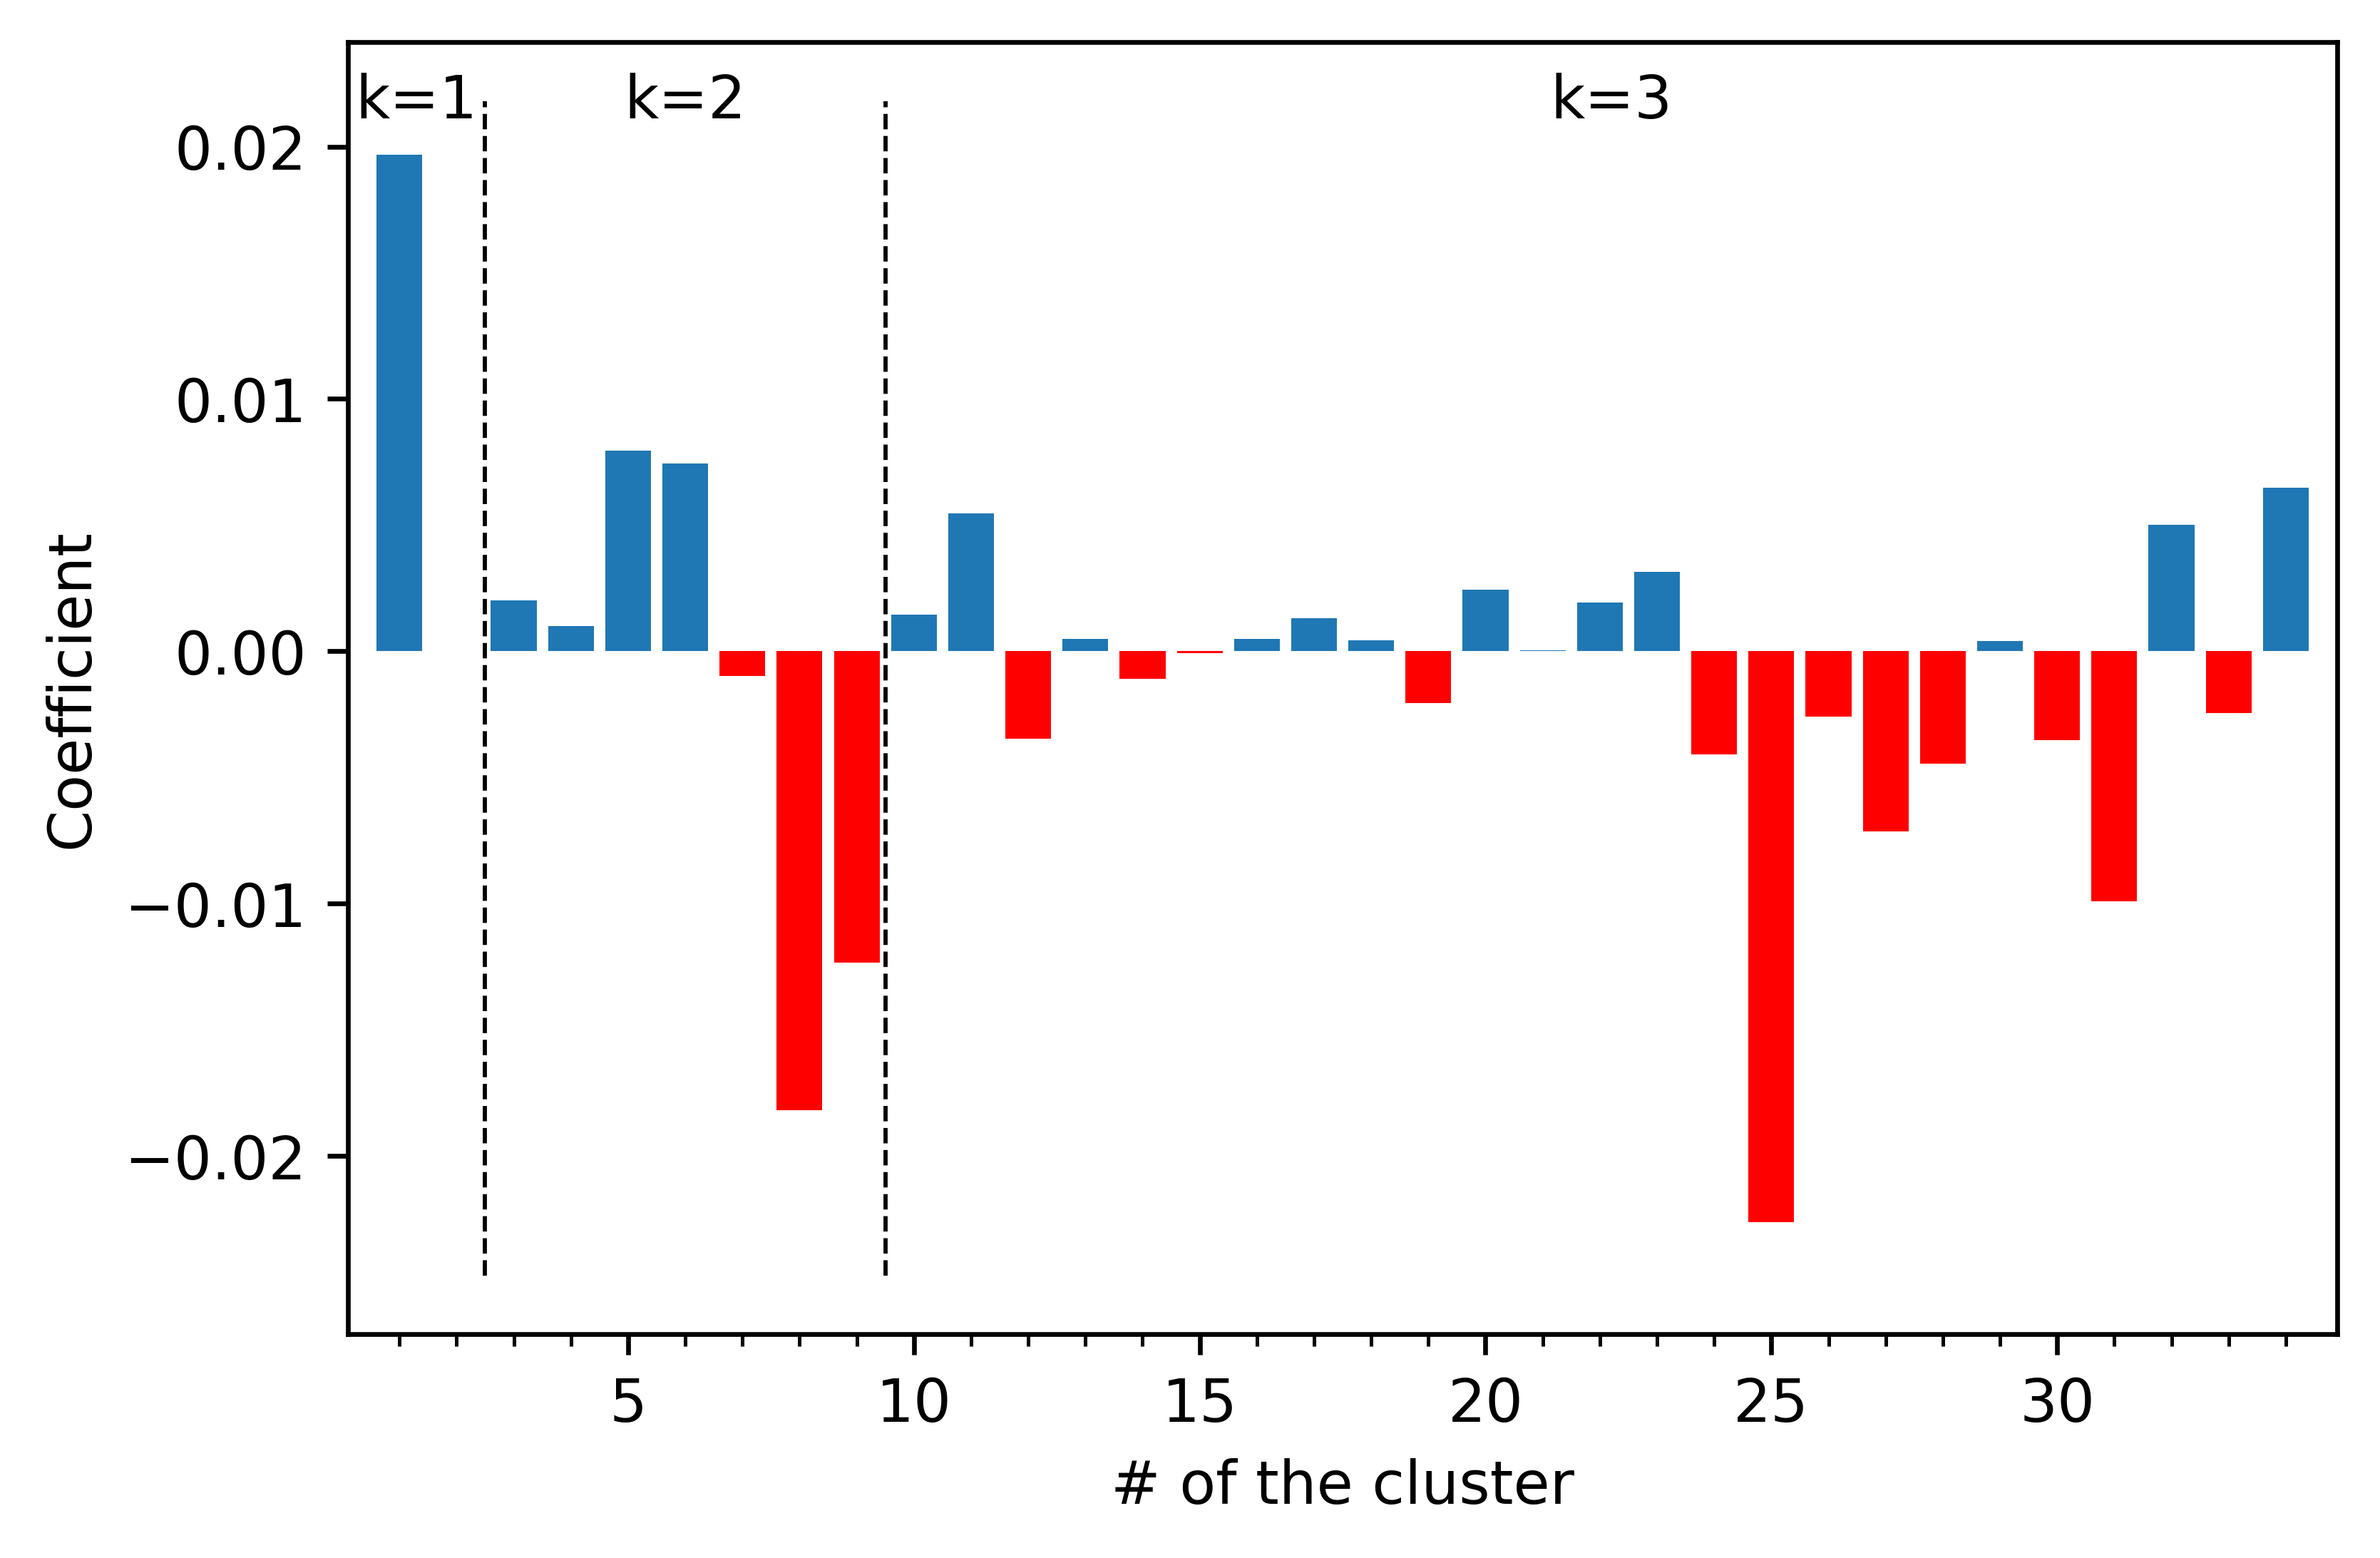

In [16]:
#Figure 6b
plt.figure()
xneg=[];xpos=[];coefneg=[];coefpos=[]
xval=np.linspace(1,34,34)
for val,cc in zip(xval,coef_egap):
    if cc>=0:
        xpos.append(val)
        coefpos.append(cc)
    elif cc<0:
        xneg.append(val)
        coefneg.append(cc)
plt.bar(xpos,coefpos)
plt.bar(xneg,coefneg,color="red")
ax=plt.gca()
ax.set_xticks([5,10,15,20,25,30])
ax.set_xticks(xval,minor=True)
plt.xlim([0.1,34.9])
ymin,ymax=ax.get_ylim()
plt.plot(np.linspace(2.5,2.5,20),np.linspace(ymin,ymax,20),"k--",linewidth=0.7)
plt.plot(np.linspace(9.5,9.5,20),np.linspace(ymin,ymax,20),"k--",linewidth=0.7)
plt.text(0.1+(2.5-0.1)/2,ymax,"k=1",ha="center",va="center")
plt.text(2.5+(9.5-2.5)/2,ymax,"k=2",ha="center",va="center")
plt.text(9.5+(34.9-9.5)/2,ymax,"k=3",ha="center",va="center")
plt.xlabel("# of the cluster")
plt.ylabel("Coefficient")
plt.show()
plt.close()

### Figure 7

In [17]:
def normalize(X):
    N, D = X.shape
    mu = np.mean(X,axis=0)
    std= np.std(X,axis=0)
    #std[std==0]=1
    Xbar=(X-mu)
    return Xbar, mu,std

In [18]:
#Compute the covariance matrix
X_normalized, mean,std = normalize(np.vstack(allstr["CorrM"].to_numpy()))
M = np.dot(X_normalized.T, X_normalized) / X_normalized.shape[0]
std=std[np.newaxis]
M_n=M/np.dot(std.T,std)

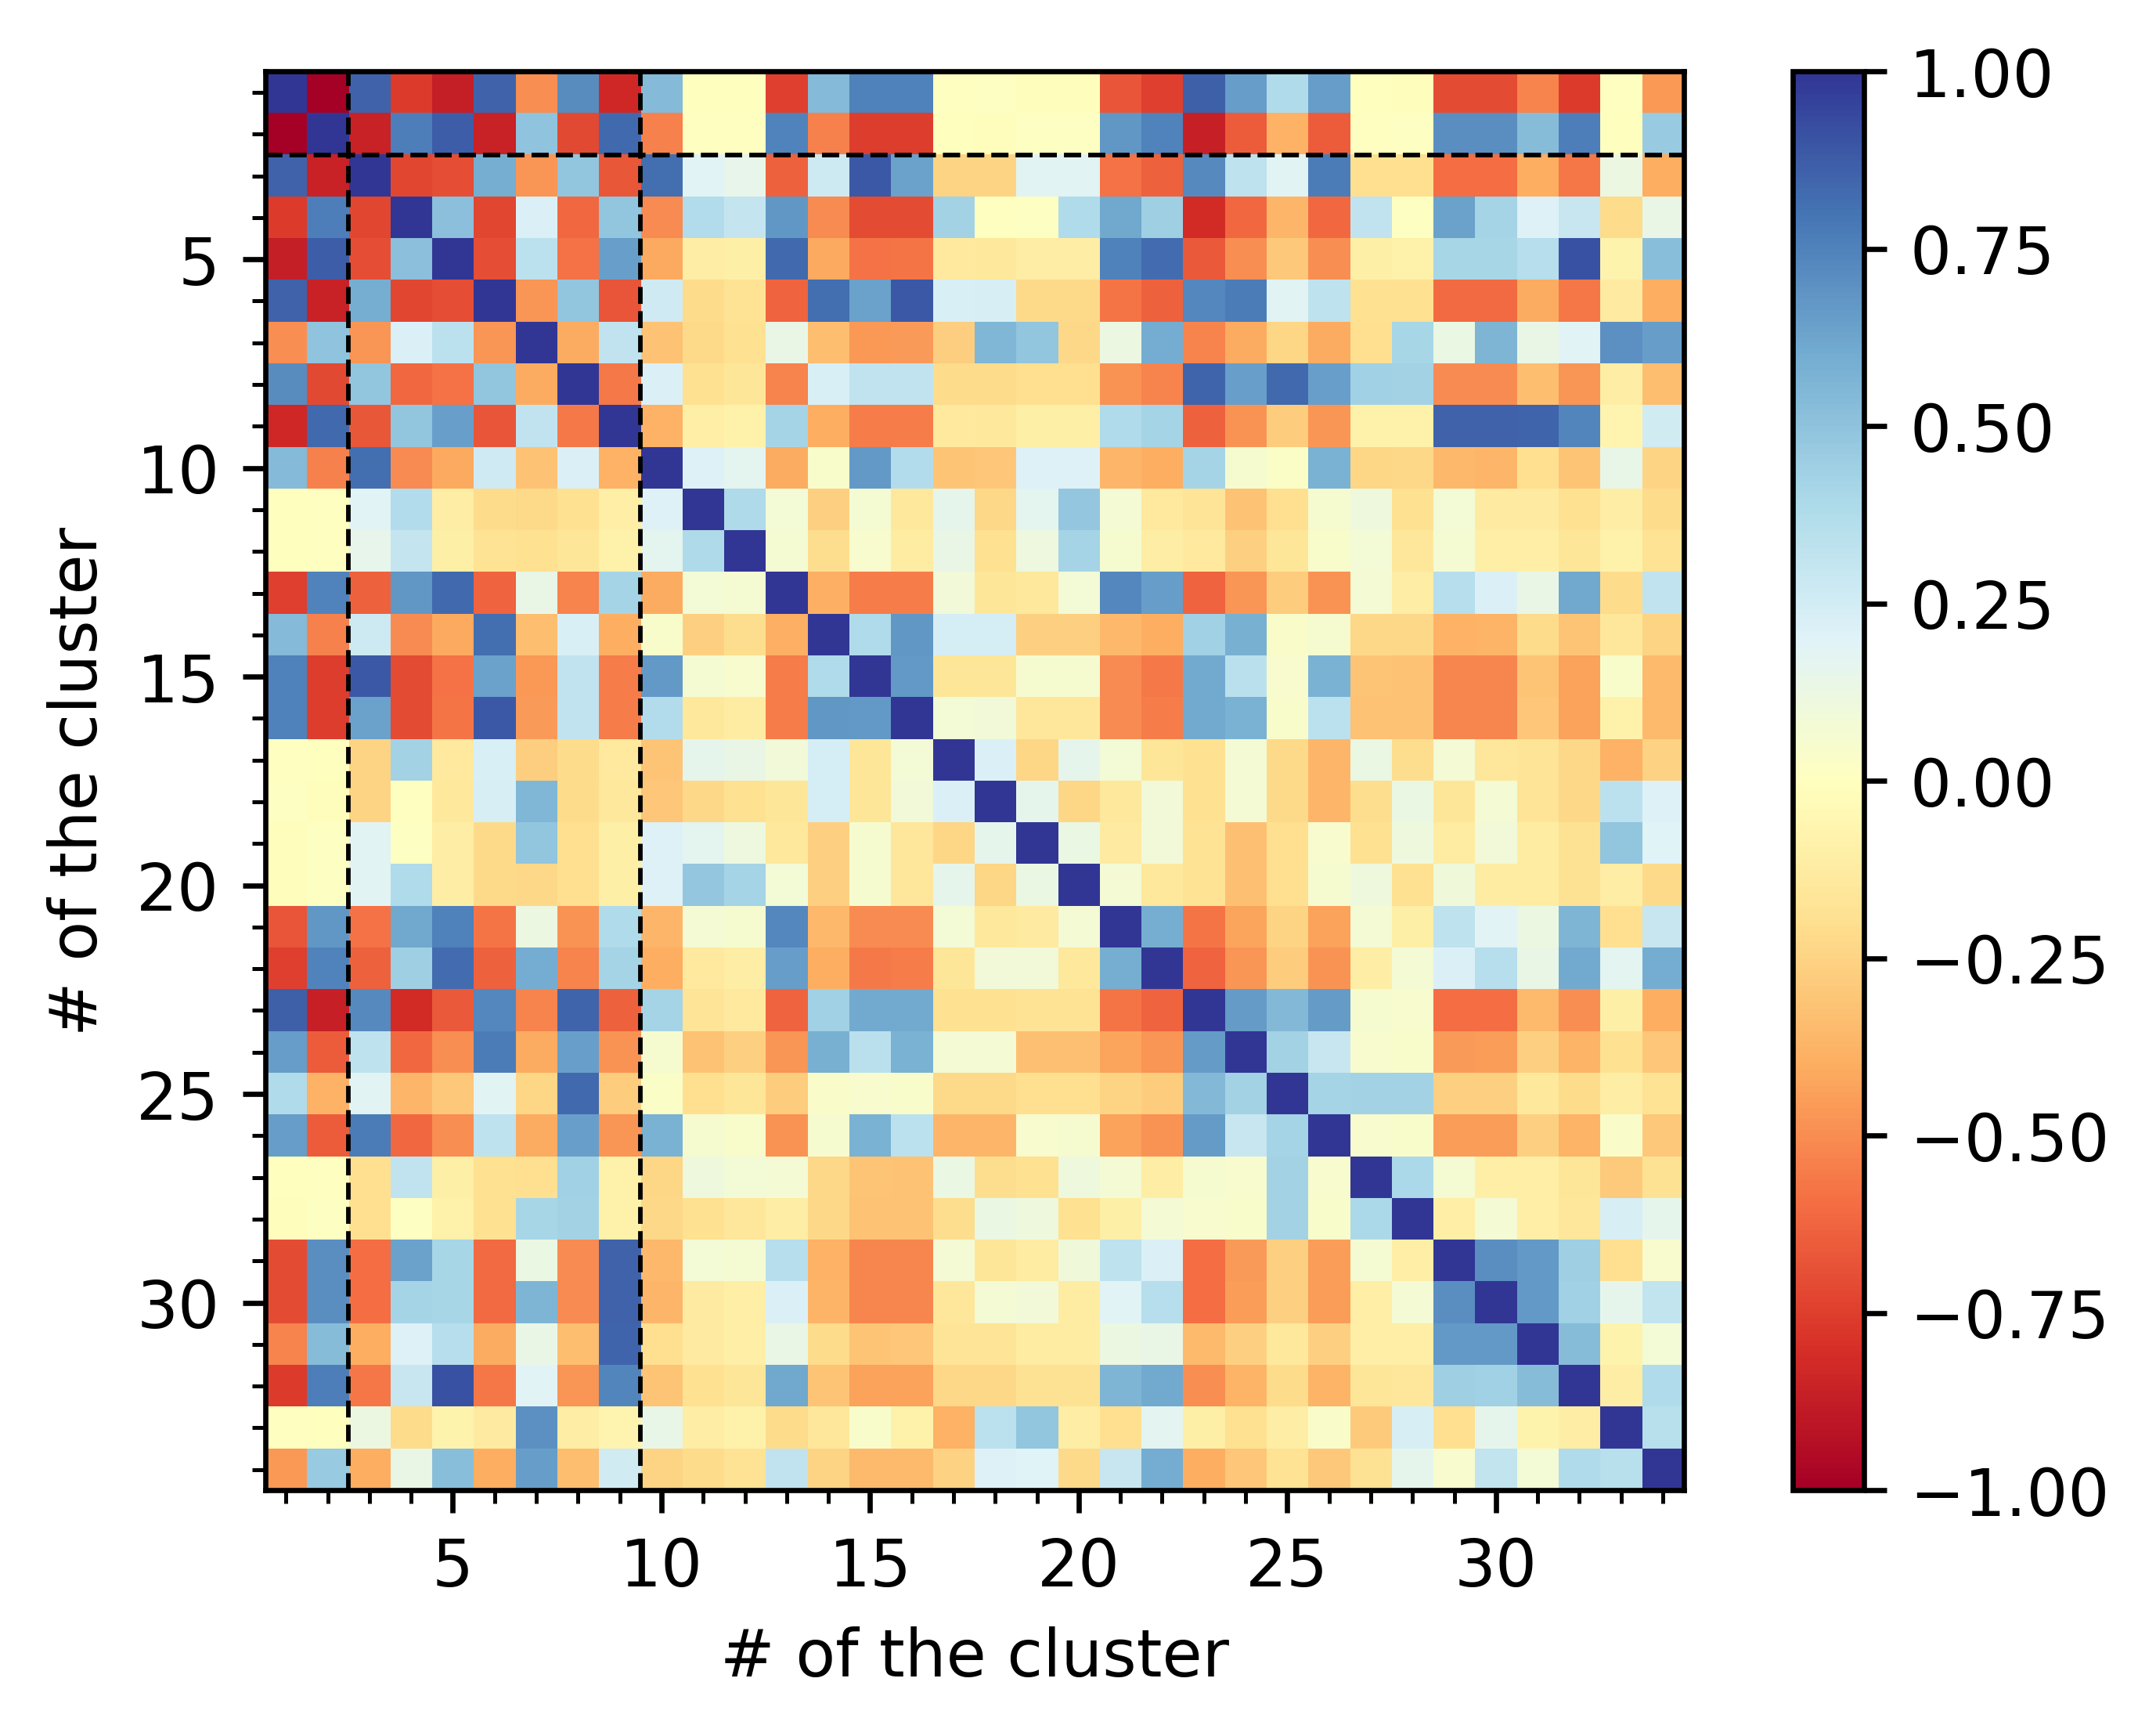

In [19]:
#Figure 7
plt.figure()
plt.imshow(M_n,interpolation='nearest',cmap=plt.get_cmap("RdYlBu"))
ax=plt.gca()
ax.set_xticks([4,9,14,19,24,29])
ax.set_xticks(np.linspace(0,33,34),minor=True)
ax.set_xticklabels(["5","10","15","20","25","30"])
ax.set_yticks([4,9,14,19,24,29])
ax.set_yticks(np.linspace(0,33,34),minor=True)
ax.set_yticklabels(["5","10","15","20","25","30"])
xmin,xmax=ax.get_xlim()
ymin,ymax=ax.get_ylim()
plt.plot(np.linspace(1.5,1.5,20),np.linspace(ymin,ymax,20),"k--",linewidth=0.7)
plt.plot(np.linspace(8.5,8.5,20),np.linspace(ymin,ymax,20),"k--",linewidth=0.7)
plt.plot(np.linspace(xmin,xmax,20),np.linspace(1.5,1.5,20),"k--",linewidth=0.7)
plt.plot(np.linspace(xmin,xmax,20),np.linspace(1.5,1.5,20),"k--",linewidth=0.7)
plt.xlabel("# of the cluster")
plt.ylabel("# of the cluster")
plt.colorbar()
plt.show()

### Figure 8

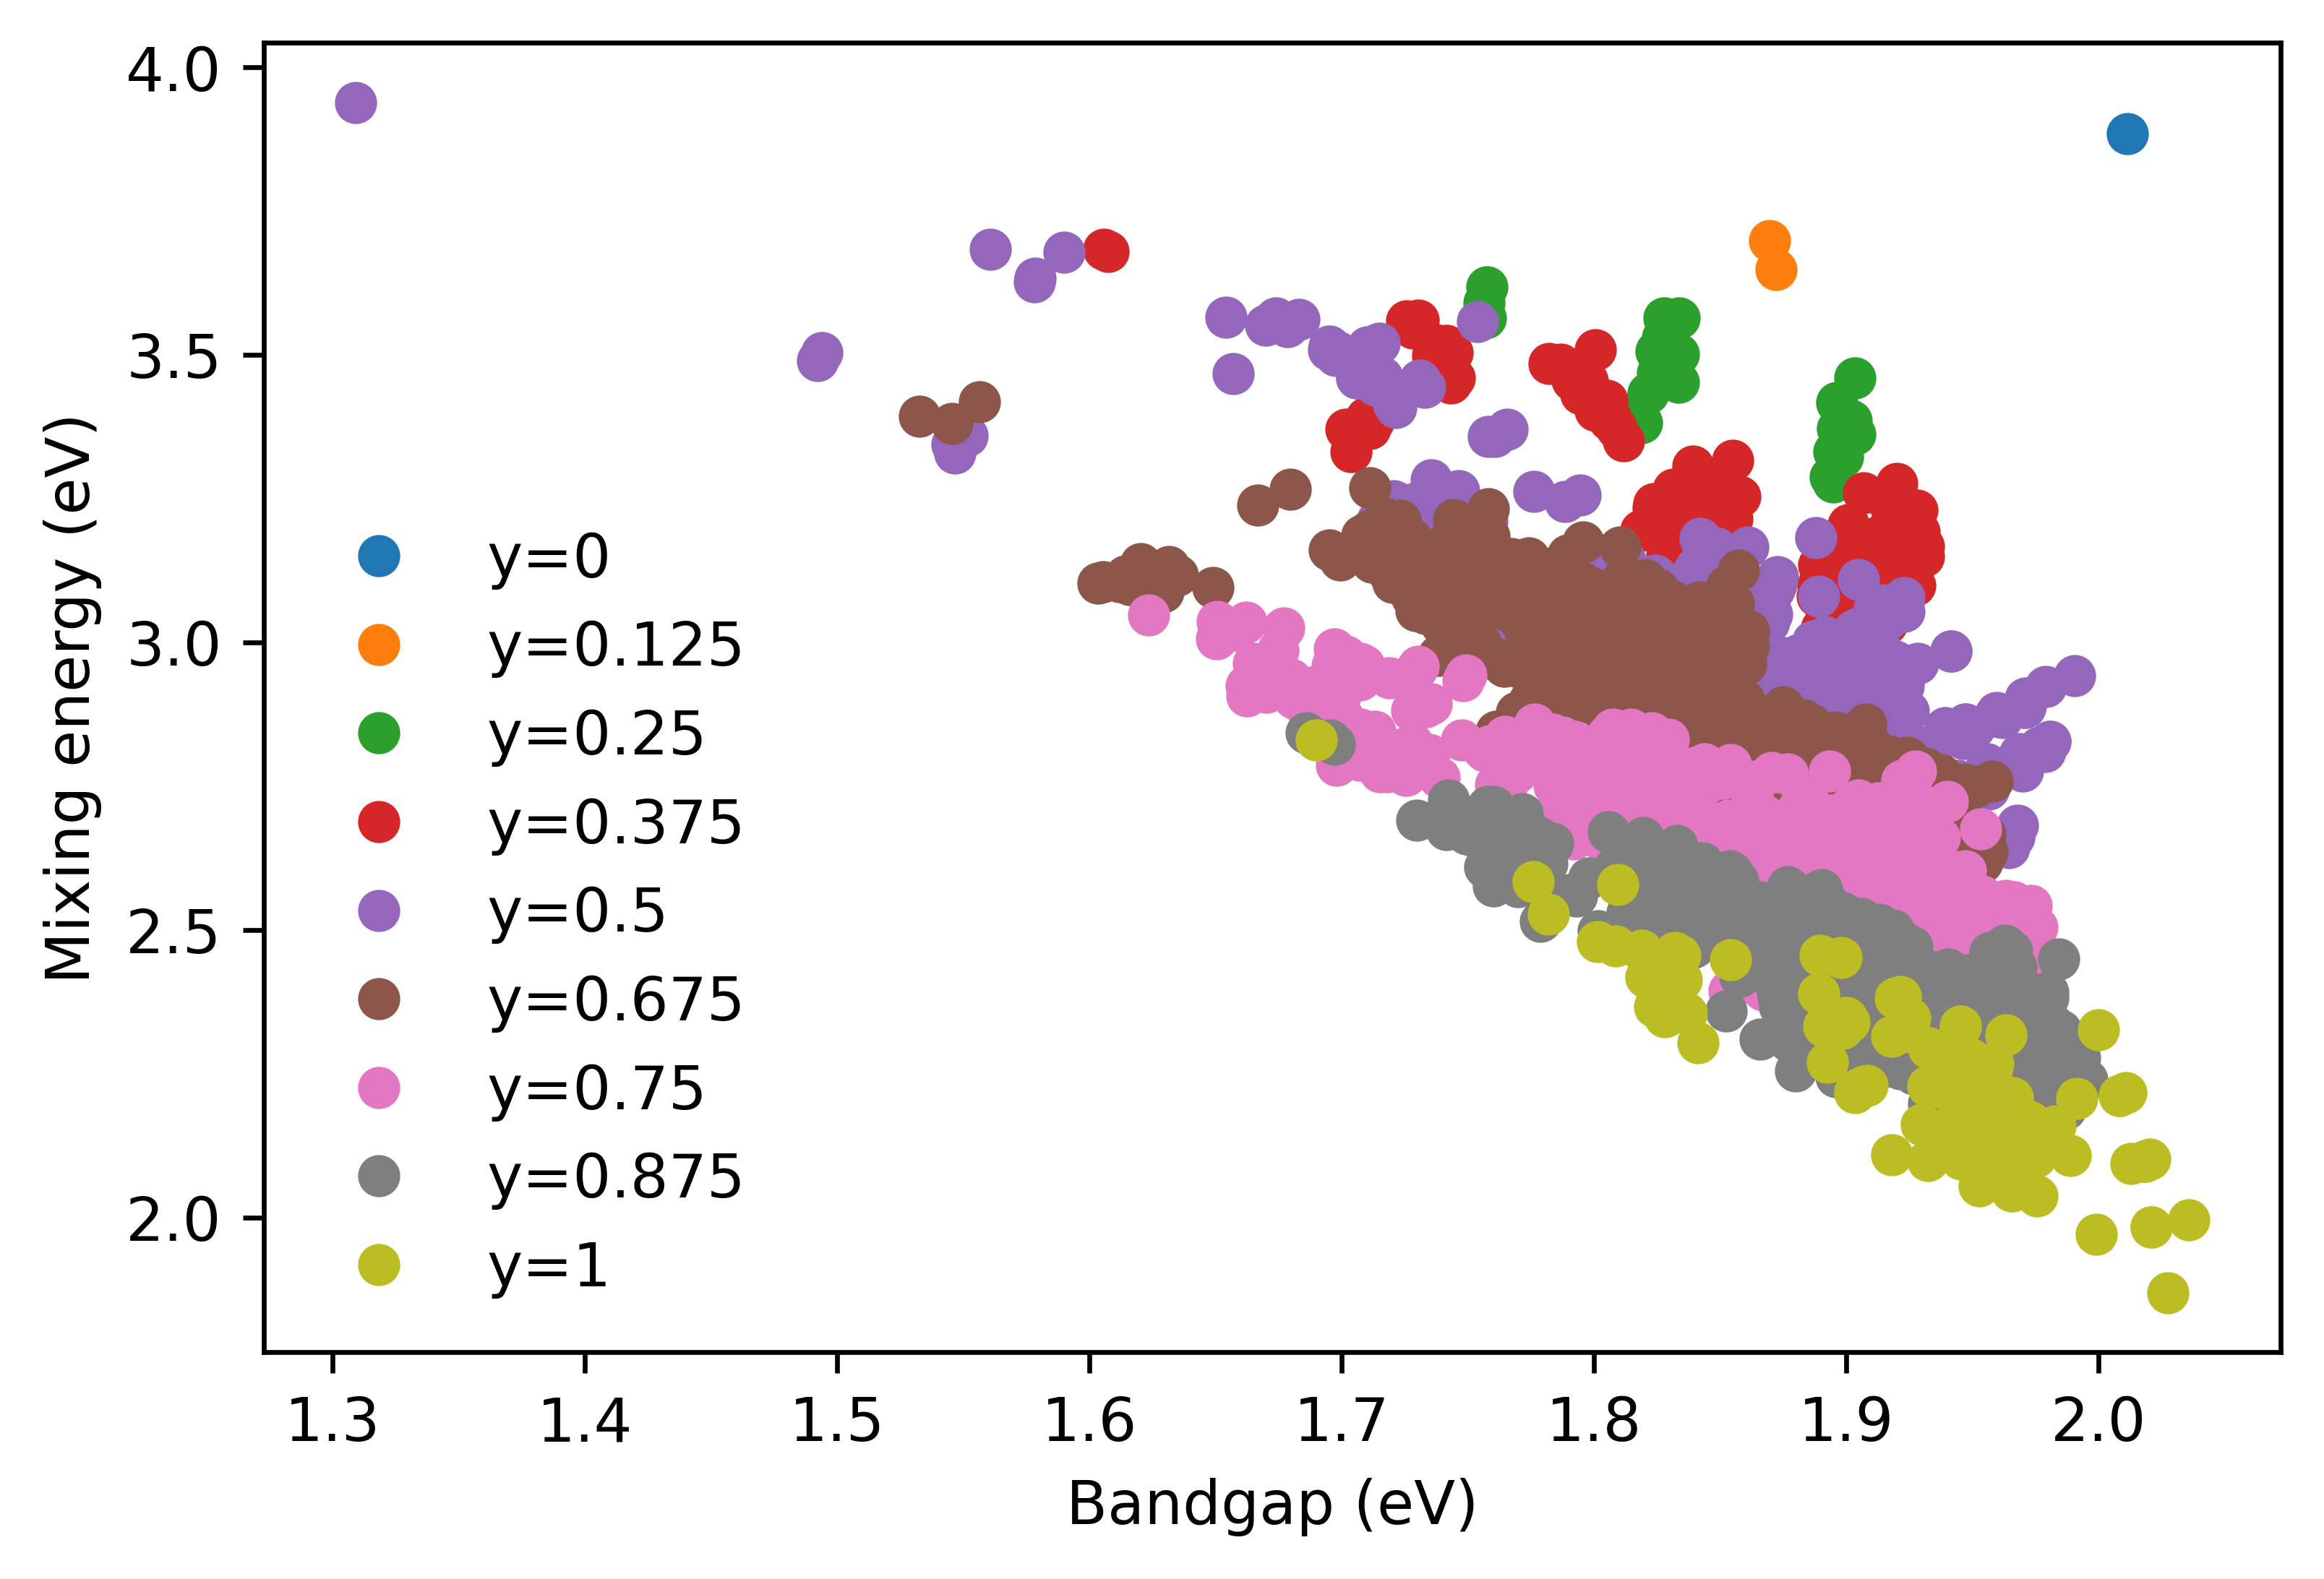

In [20]:
#Figure 8a
plt.figure()
for inv in np.unique(allstr['y']):
    plt.plot(allstr[allstr['y']==inv]['HSE-corr_ens-meanpred'],allstr[allstr['y']==inv]['MixE_pred'],'o')
plt.ylabel("Mixing energy (eV)")
plt.xlabel("Bandgap (eV)")
plt.legend(["y=0","y=0.125","y=0.25","y=0.375","y=0.5","y=0.675","y=0.75","y=0.875","y=1"],frameon=False)
plt.show()
plt.close()

### Figure 9

In [21]:
#Load the data
eq_inv=pd.read_excel('../repository_data/inversion-analysis.xlsx',sheet_name='eq. inversion',skiprows=1,usecols="C:E")
ener_inv=pd.read_excel('../repository_data/inversion-analysis.xlsx',sheet_name='energy and free energy',skiprows=1,usecols="C:F",na_values='--')

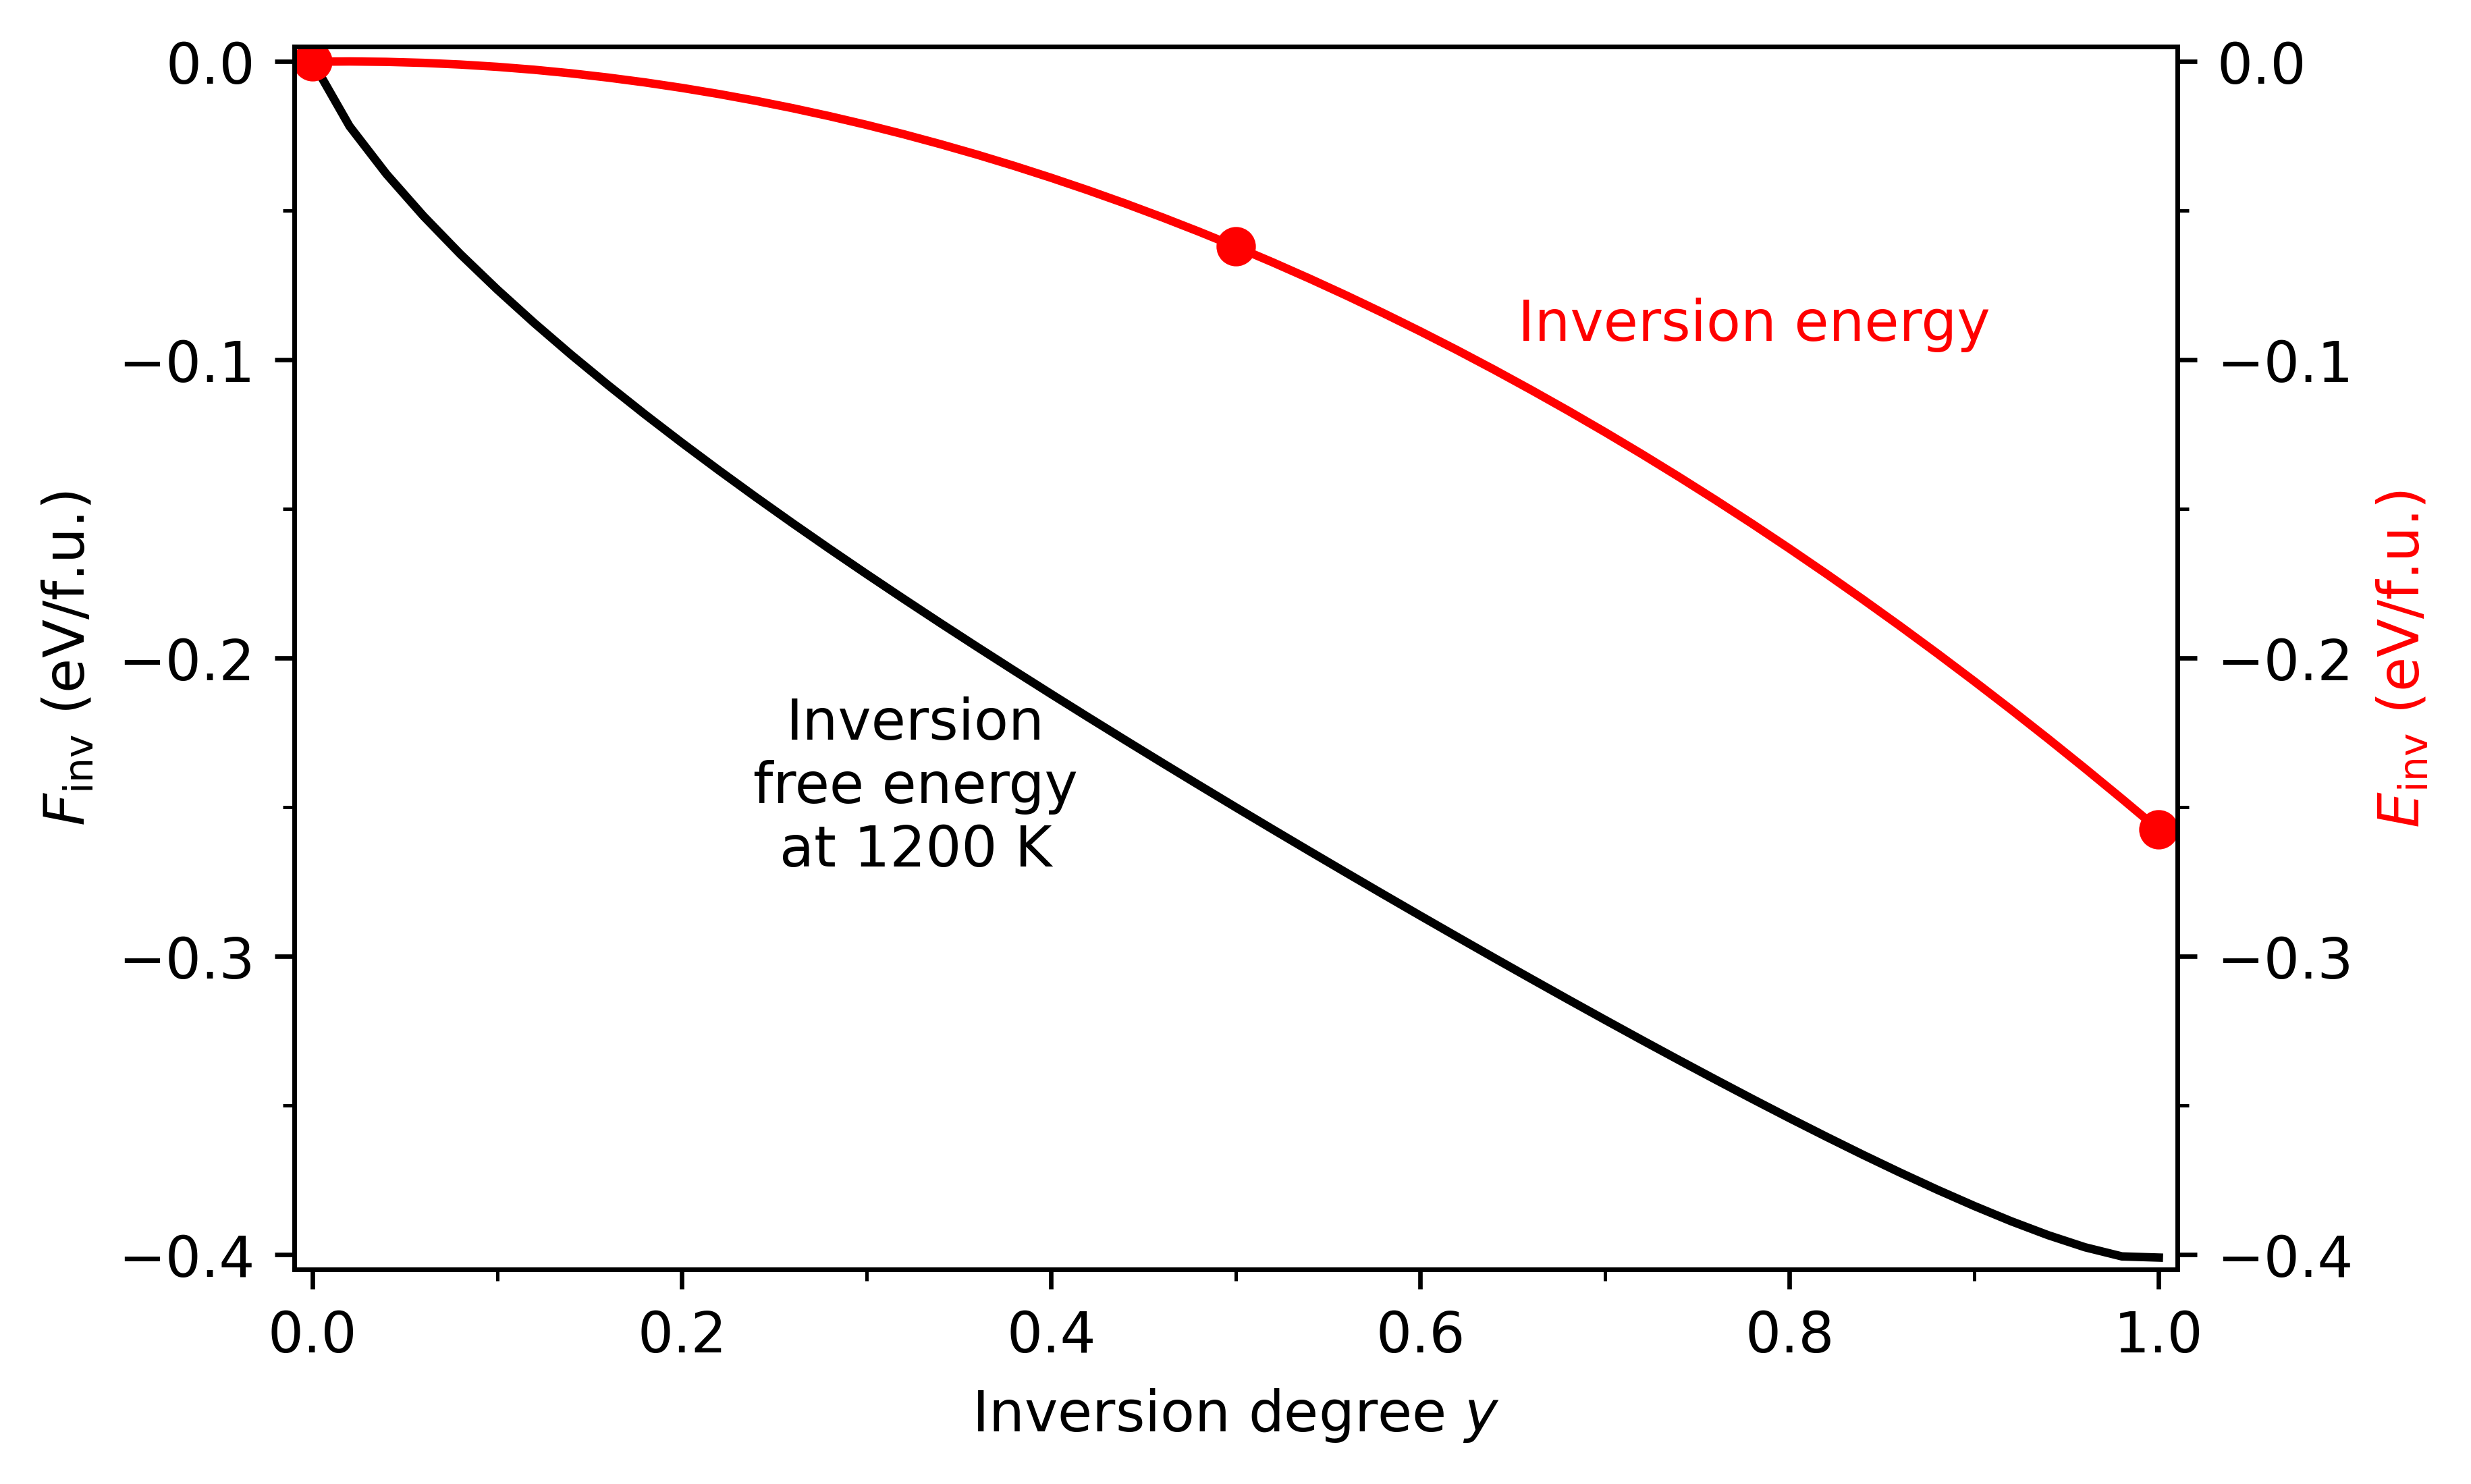

In [22]:
#Figure 9a
plt.figure()

plt.plot(ener_inv['y'],ener_inv['Einv-quadratic fit'],'r-')
plt.plot(ener_inv['y'],ener_inv['Finv'],'k-')
plt.plot(ener_inv['y'],ener_inv['Einv3p'],'ro')
plt.xlim([-0.01,1.01])
plt.ylim([-0.405,0.005])
plt.xlabel(r'Inversion degree $\it{y}$')
plt.ylabel(r'$\it{F}$$_{\rm inv}$ (eV/f.u.)')
ax=plt.gca()

xmin,xmax=ax.get_xlim()
ymin,ymax=ax.get_ylim()
xtag1=xmin+0.65*(xmax-xmin)
ytag1=ymin+0.76*(ymax-ymin)
xtag2=xmin+0.33*(xmax-xmin)
ytag2=ymin+0.33*(ymax-ymin)
plt.text(xtag1,ytag1,'Inversion energy',color='r')
plt.text(xtag2,ytag2,'Inversion\nfree energy\nat 1200 K',ha='center')

ax.set_xticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],minor=True)
ax.set_yticks([0.0,-0.05,-0.1,-0.15,-0.2,-0.25,-0.3,-0.35,-0.4],minor=True)
ax.set_yticks([0.0,-0.1,-0.2,-0.3,-0.4])

axr=ax.twinx()
axr.set_ylabel(r'$\it{E}$$_{\rm inv}$ (eV/f.u.)',color='r')
axr.set_ylim([-0.405,0.005])
axr.set_yticks([0.0,-0.05,-0.1,-0.15,-0.2,-0.25,-0.3,-0.35,-0.4],minor=True)
axr.set_yticks([0.0,-0.1,-0.2,-0.3,-0.4])

plt.show()

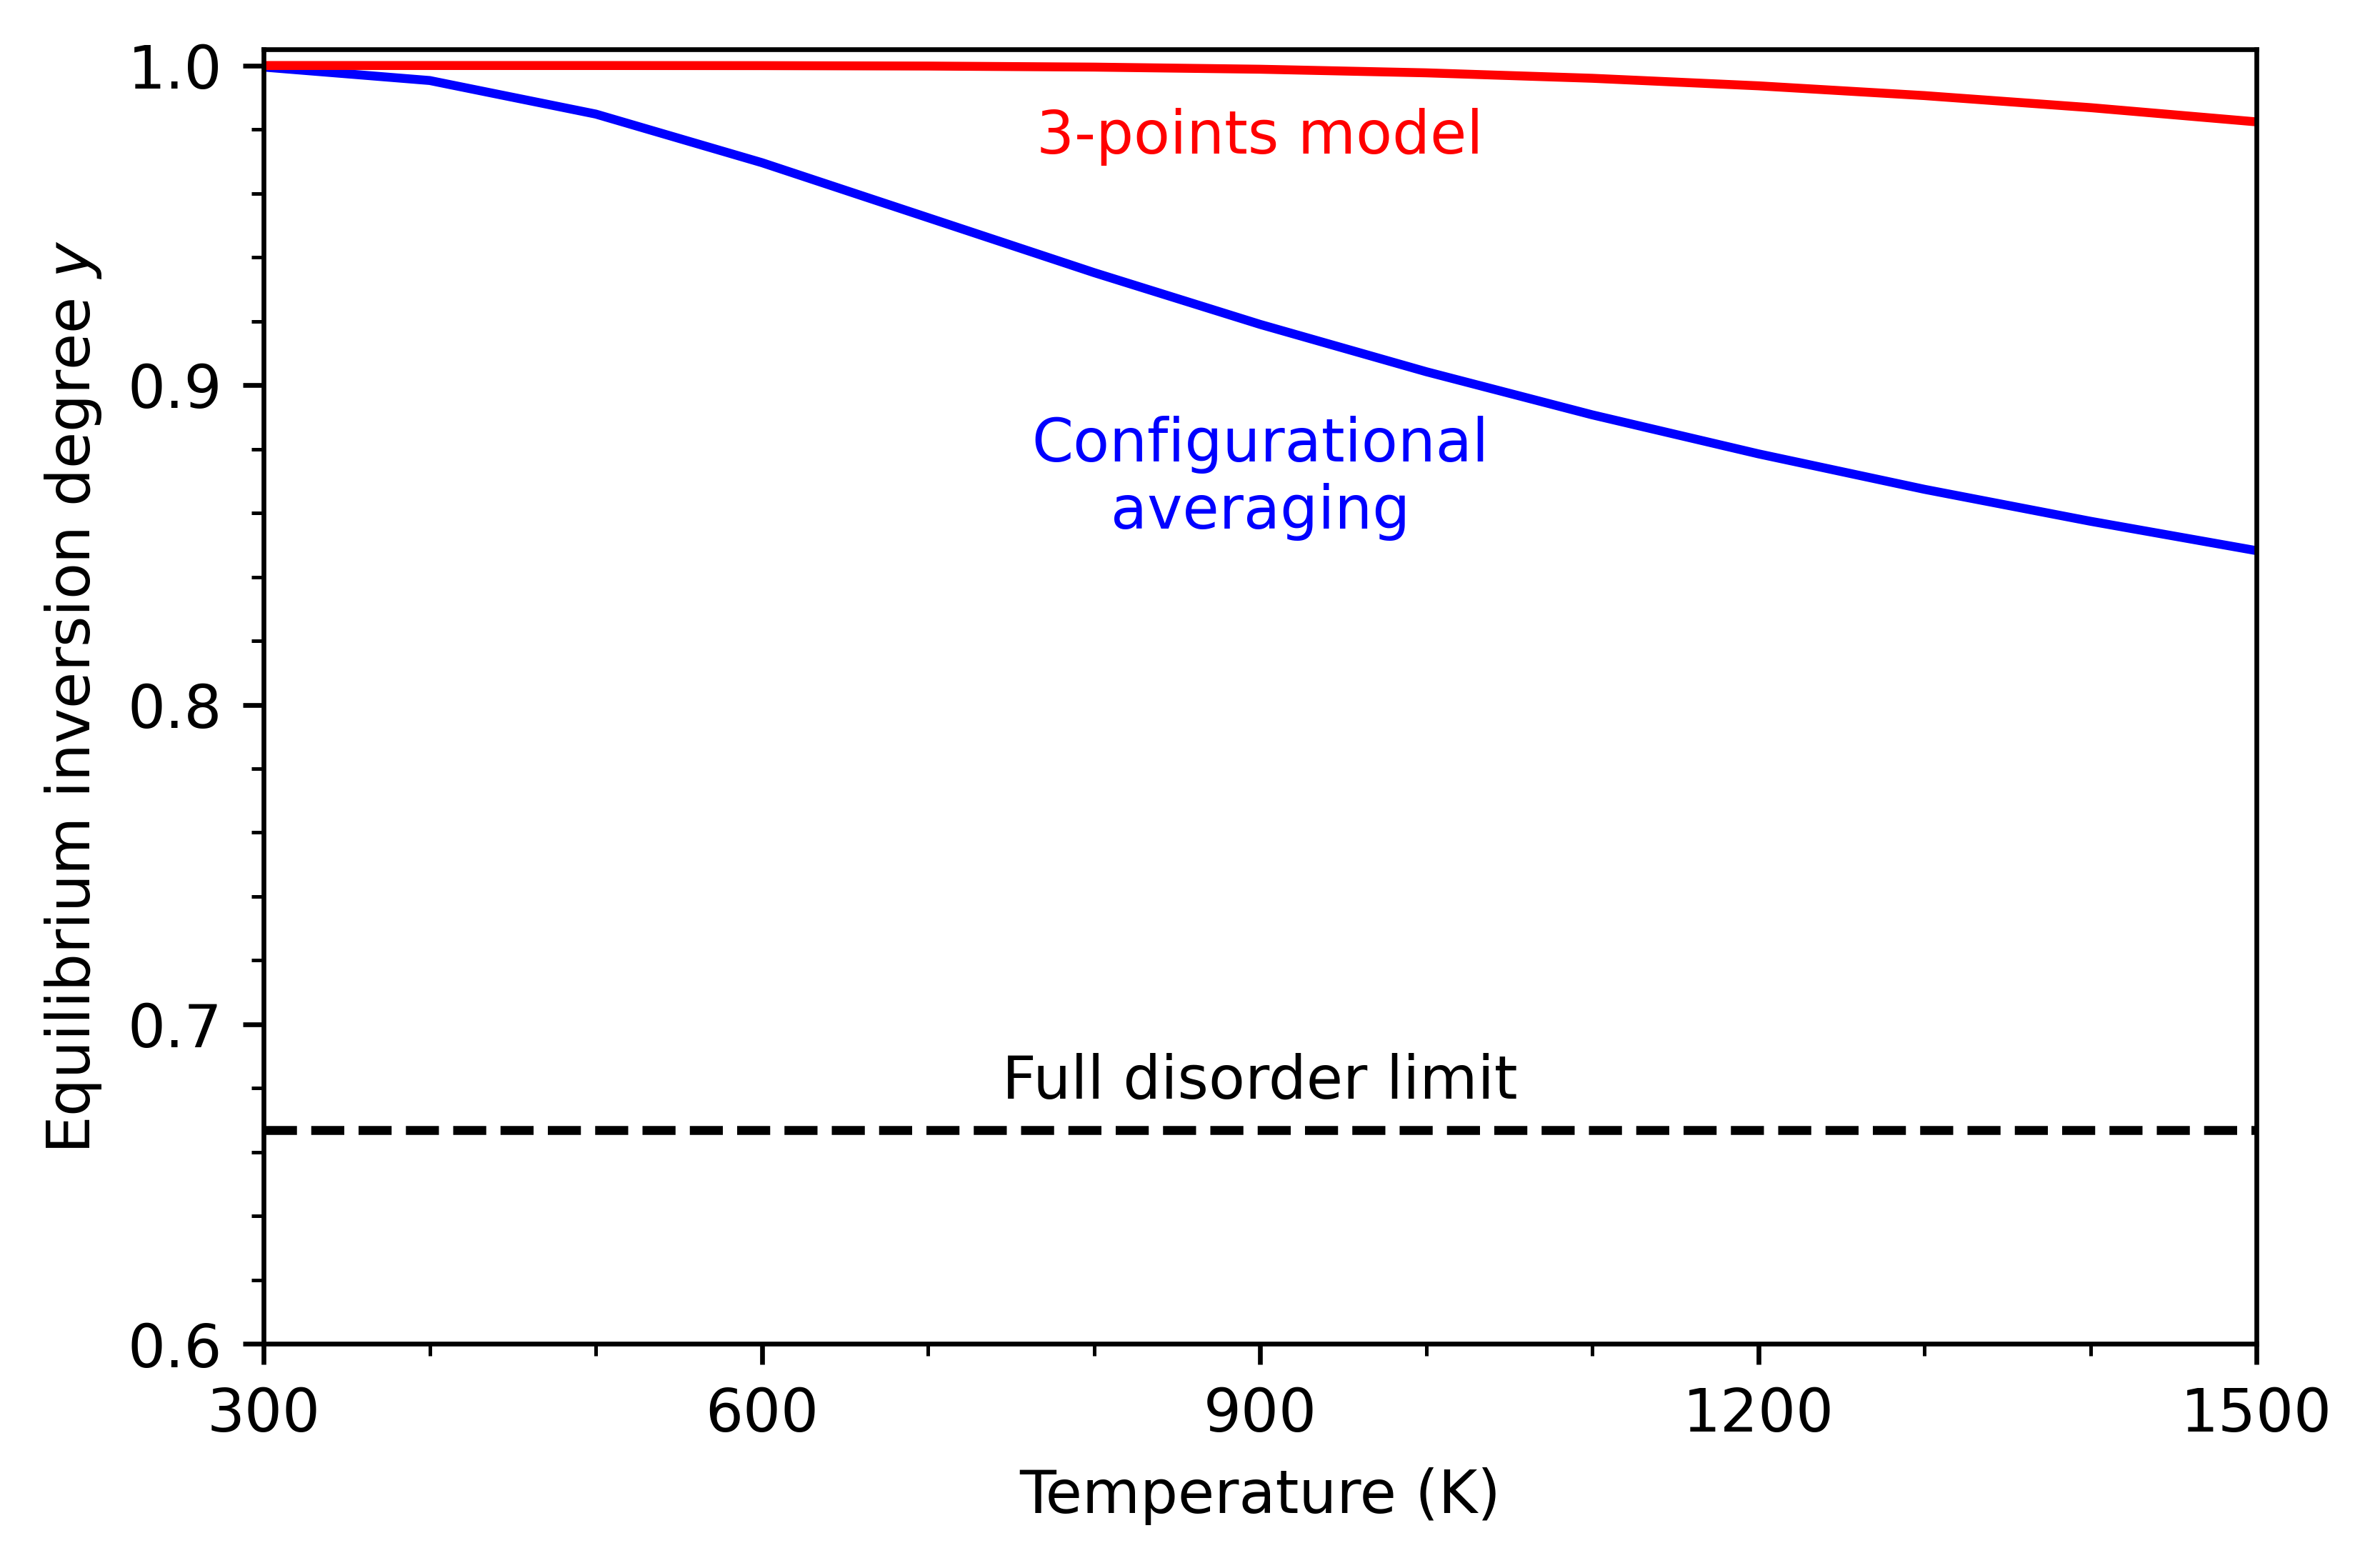

In [23]:
#Figure 9b
plt.figure()

plt.plot(eq_inv['T'],eq_inv['Config. Ave. Model'],'b-')
plt.plot(eq_inv['T'],eq_inv['3P Model'],'r-')
plt.plot([300,1500],[0.667,0.667],'k--')
plt.xlim([300,1500])
plt.ylim([0.6,1.005])
plt.xlabel(r'Temperature (K)')
plt.ylabel(r'Equilibrium inversion degree $\it{y}$')

ax=plt.gca()
xmin,xmax=ax.get_xlim()
ymin,ymax=ax.get_ylim()
xtag=xmin+0.5*(xmax-xmin)
ytag1=ymin+0.63*(ymax-ymin)
ytag2=ymin+0.92*(ymax-ymin)
ytag3=ymin+0.19*(ymax-ymin)
plt.text(xtag,ytag1,'Configurational\naveraging',color='b',ha='center')
plt.text(xtag,ytag2,'3-points model',color='r',ha='center')
plt.text(xtag,ytag3,'Full disorder limit',color='k',ha='center')

ax.set_xticks([300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500],minor=True)
ax.set_xticks([300,600,900,1200,1500])
ax.set_yticks([0.6,0.62,0.64,0.66,0.68,0.7,0.72,0.74,0.76,0.78,0.8,0.82,0.84,0.86,0.88,0.9,0.92,0.94,0.96,0.98,1],minor=True)
ax.set_yticks([0.6,0.7,0.8,0.9,1.0])

plt.show()